# Empieza el proyecto 

### Se importan librerias 

In [3]:
import gzip
import pandas as pd
import numpy as np 
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Se importan los dataset

In [4]:
dfsteamgames = pd.read_json("C:\\Users\\h98go\\Desktop\\Primer proyecto\\drive-download-20241008T191011Z-001\\output_steam_games.json", encoding='utf-8', lines=True)


### Se comprueban la cantidad de filas originales que hay en el dataset.

In [4]:
dfsteamgames.shape

(120445, 13)

### Aqui se puede notar que hay un error en la autoidentificacion de las variables.

In [5]:
dfsteamgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


## Se soluciona el error de autoidentificacion

In [7]:
dfsteamgames['id']= dfsteamgames['id'].astype(object)

### Para saber la cantidad totales de nulos que hay en el dataset 'output steam games'

In [6]:
dfsteamgames.isnull().sum()

### Aqui se elimina todas las filas que estan totalmente vacias

In [8]:
dfsteamgames = dfsteamgames.dropna(how='all')


### Se comprueban la cantidad de filas eliminadas 

In [12]:
dfsteamgames.shape

In [38]:
dfsteamgames.info()

## Se elimina columna 'url', 'early access', 'app_name' , 'reviews url' y 'specs' irrelevante para el objetivo del proyecto.

#### Decido guardar columna 'app name' para futuros casos

In [9]:
dfsteamgames.drop(columns=['url'],inplace=True)

In [10]:
dfsteamgames.drop(columns=['early_access'],inplace=True)

In [11]:
dfsteamgames.drop(columns=['reviews_url'],inplace=True)

In [12]:
dfsteamgames.drop(columns=['specs'],inplace=True)

### Compruebo la eliminacion

In [45]:
dfsteamgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 5   tags          31972 non-null  object 
 6   price         30758 non-null  object 
 7   id            32133 non-null  float64
 8   developer     28836 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.5+ MB


## Aqui se puede notar que hay un valor de id repetido Que indica eso ?

In [48]:
dfsteamgames.describe()

,publisher,genres,app_name,title,release_date,tags,price,id,developer
count,24083,28852,32133,30085,30068,31972,30758.00,32133.0,28836
unique,8239,883,32094,30054,3582,15395,162.00,32132.0,10992
top,Ubisoft,[Action],Soundtrack,Soundtrack,2012-10-16,"[Casual, Simulation]",4.99,612880.0,Ubisoft - San Francisco
freq,385,1880,3,3,100,1292,4278.00,2.0,1259


## Se elimina la fila duplicada

In [13]:
dfsteamgames = dfsteamgames.drop_duplicates(subset=['id'])  #(subset=['id'])

## Comprobacion

In [50]:
dfsteamgames.describe()

,publisher,genres,app_name,title,release_date,tags,price,id,developer
count,24081,28850,32131,30083,30066,31970,30756.00,32132.0,28834
unique,8239,883,32094,30054,3582,15395,162.00,32132.0,10992
top,Ubisoft,[Action],Soundtrack,Soundtrack,2012-10-16,"[Casual, Simulation]",4.99,761140.0,Ubisoft - San Francisco
freq,385,1879,3,3,100,1292,4278.00,1.0,1259


### Me parece que hay que hacer un analisis primero antes de la conversion. 

### No se puede realizar la conversion de la columna porque existen valores str 'free to play' y 'free to use'

In [10]:
#df['columna'] = df['columna'].astype(float)
dfsteamgames['price']= dfsteamgames['price'].astype(float)

ValueError: could not convert string to float: 'Free To Play'

## No se puede realizar conversion por elementos str presentes en las filas 

In [26]:
dfsteamgames['release_date']= dfsteamgames['release_date'].astype('date64[pyarrow]')

### Eliminacion de los valores nulos de la columna 'id'. Estos valores se eliminan porque son irrevalentes en comparacion al tamaño del dataset. 

In [57]:
dfsteamgames = dfsteamgames.dropna(subset=['id'])

In [17]:
dfsteamgames.info()

# Se analizan las variables categoricas 

C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33268 (\N{CJK UNIFIED IDEOGRAPH-81F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28784 (\N{CJK UNIFIED IDEOGRAPH-7070}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra

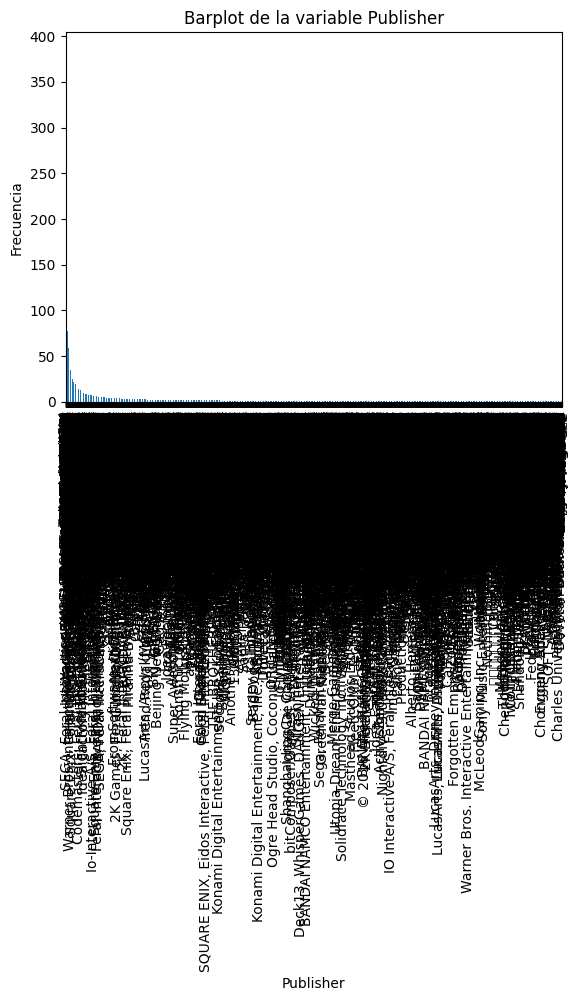

In [51]:


# Contar la frecuencia de cada valor en la columna 'publisher'
publisher_counts = dfsteamgames['publisher'].value_counts()

# Crear el gráfico de barras usando los conteos
publisher_counts.plot(kind='bar')

# Se ponen título y etiquetas
plt.title('Barplot de la variable Publisher')
plt.ylabel('Frecuencia')
plt.xlabel('Publisher')

# Mostrar la gráfica
plt.show()


### Como se puede apreciar graficamente es imposible distinguir algun error comun de tipografia porque existen demasiados valores unicos, se toma la opcion de importar una libreria que ayude a encontrar coincidencias en los textos y asi aumentar la fiabilidad de los datos. 

### Se instalo fuzzywuzzy como libreria de apoyo para detectar anomalias. 

### Se instalo leveshtein como libreria de optimizacion  


# Analisis con 'describe all' 

In [52]:
dfsteamgames.describe(include='all')

,publisher,genres,app_name,title,release_date,tags,price,id,developer
count,24081,28850,32131,30083,30066,31970,30756.00,32132.0,28834
unique,8239,883,32094,30054,3582,15395,162.00,32132.0,10992
top,Ubisoft,[Action],Soundtrack,Soundtrack,2012-10-16,"[Casual, Simulation]",4.99,761140.0,Ubisoft - San Francisco
freq,385,1879,3,3,100,1292,4278.00,1.0,1259


### Analisis columna 'publisher'

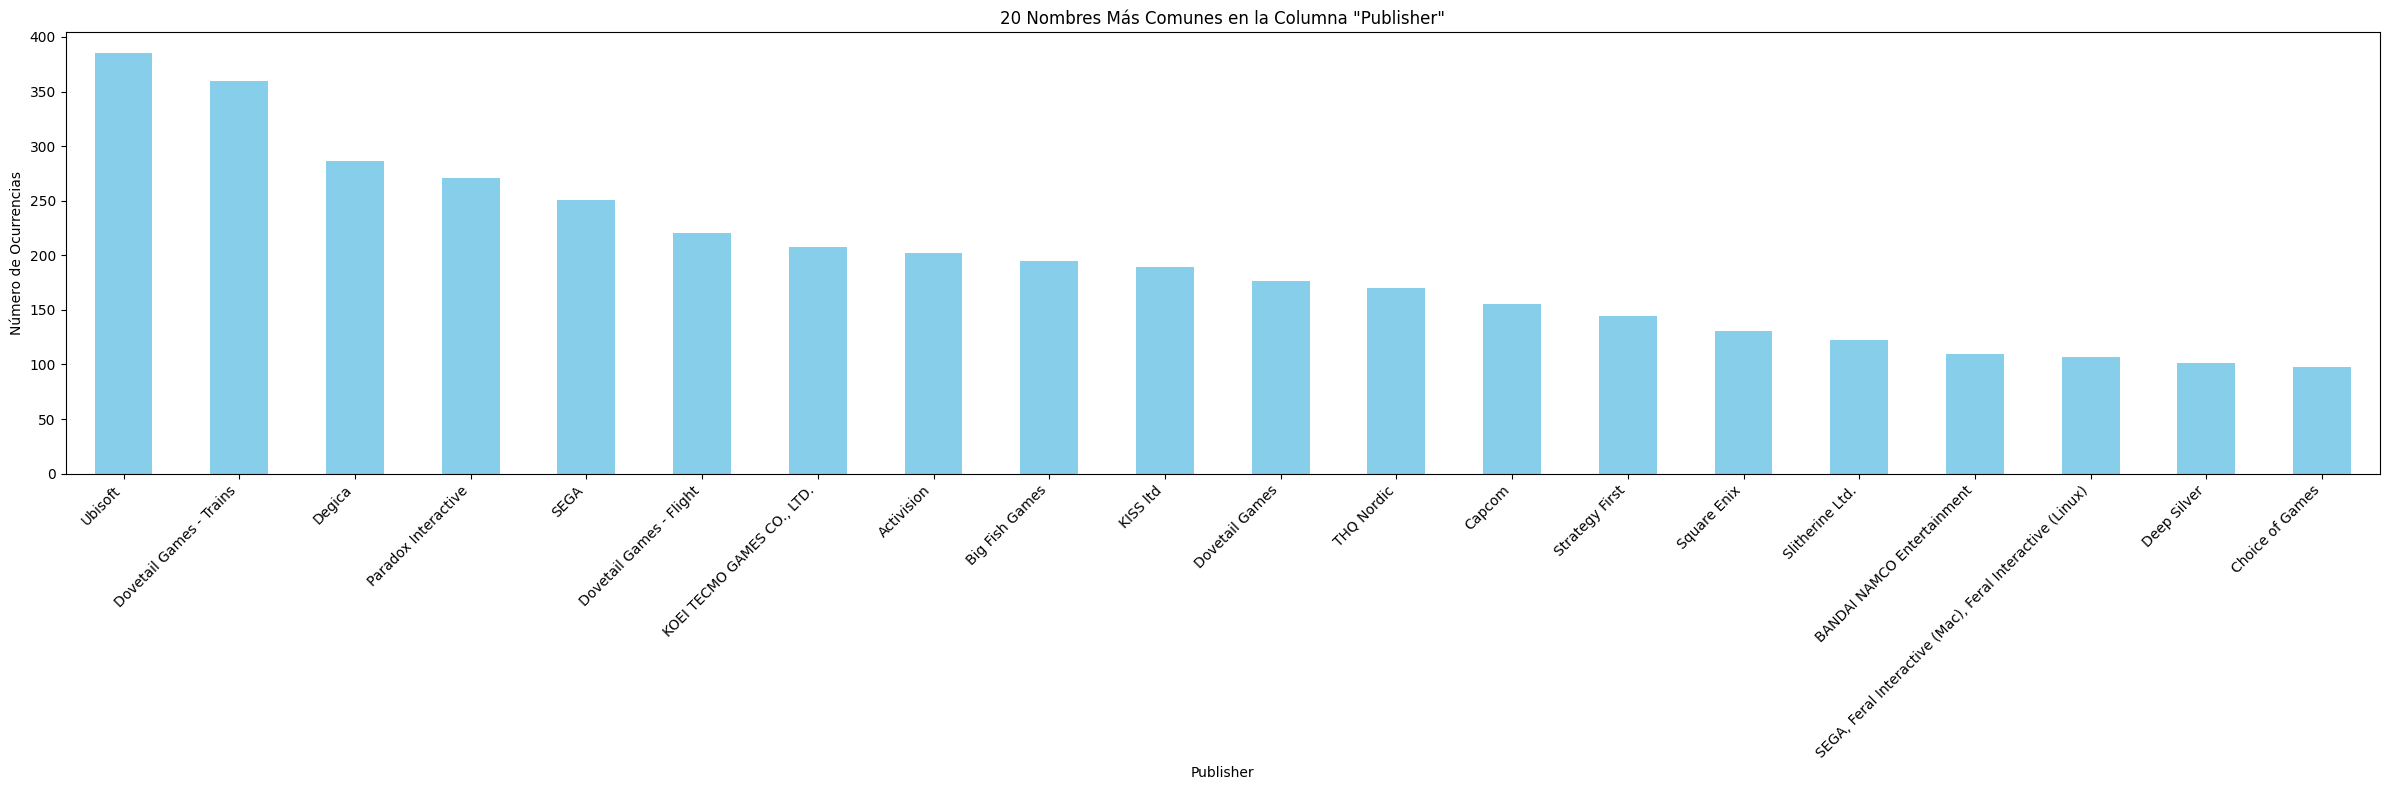

In [7]:
top_publishers = dfsteamgames['publisher'].dropna().value_counts().nlargest(20)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_publishers.plot(kind='bar', color='skyblue')
plt.title('20 Nombres Más Comunes en la Columna "Publisher"')
plt.xlabel('Publisher')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor
plt.show()

In [59]:
suma_top_publishers = top_publishers.sum()
print(suma_top_publishers)

### Esta es la solucion al error 'not hashable' que no permite graficar ciertas columnas 

### Analisis de la columna 'genre' 

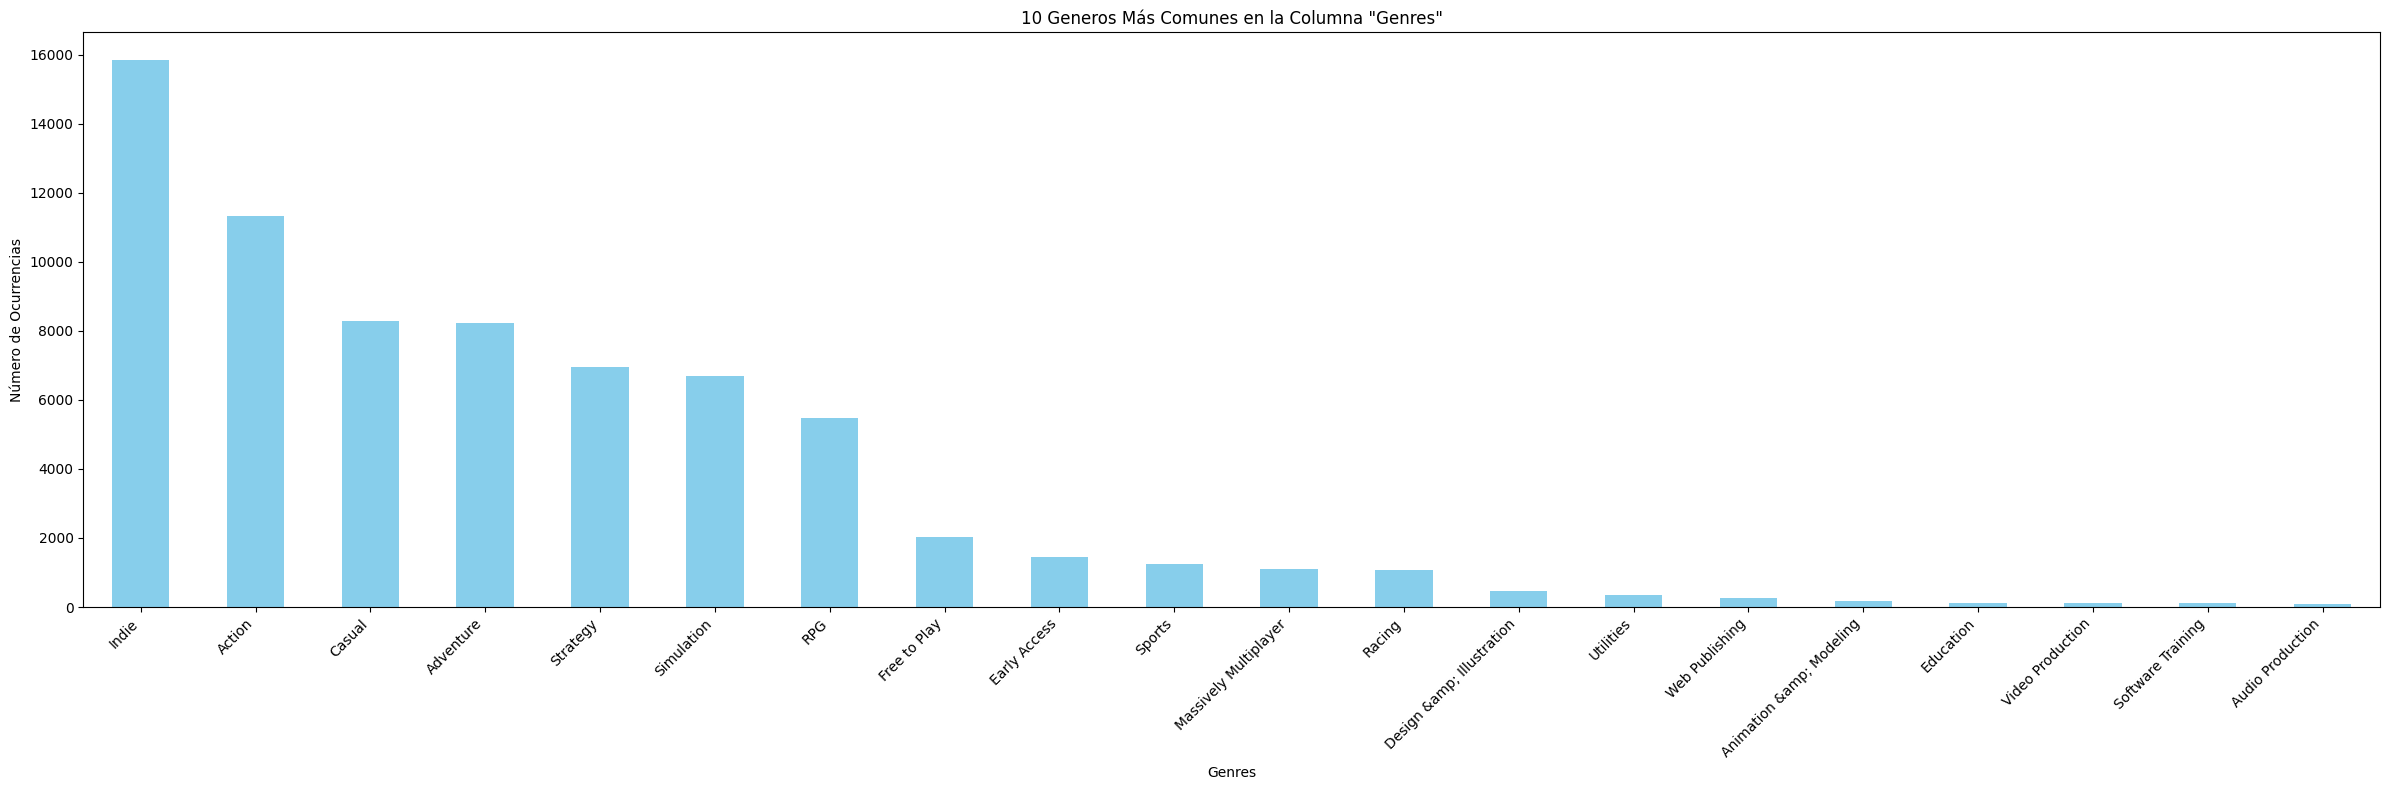

In [53]:


# Supongamos que dfsteamgames ya está definido

# Aplanar la columna 'genres'
all_genres = [genre for sublist in dfsteamgames['genres'].dropna() for genre in sublist]

# Contar la frecuencia de cada género
top_genres = pd.Series(all_genres).value_counts().nlargest(20)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_genres.plot(kind='bar', color='skyblue')
plt.title('10 Generos Más Comunes en la Columna "Genres"')
plt.xlabel('Genres')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor

plt.show()


In [54]:
suma_top_genres = top_genres.sum()
print(suma_top_genres)

71467


In [55]:
dfsteamgames['genres'].isnull().sum()

3283

In [145]:
dfsteamgames['genres'].head()

### Analisis de la columna 'app_name'

#### Vas a tener que unir la columna app name con la columna titulo.

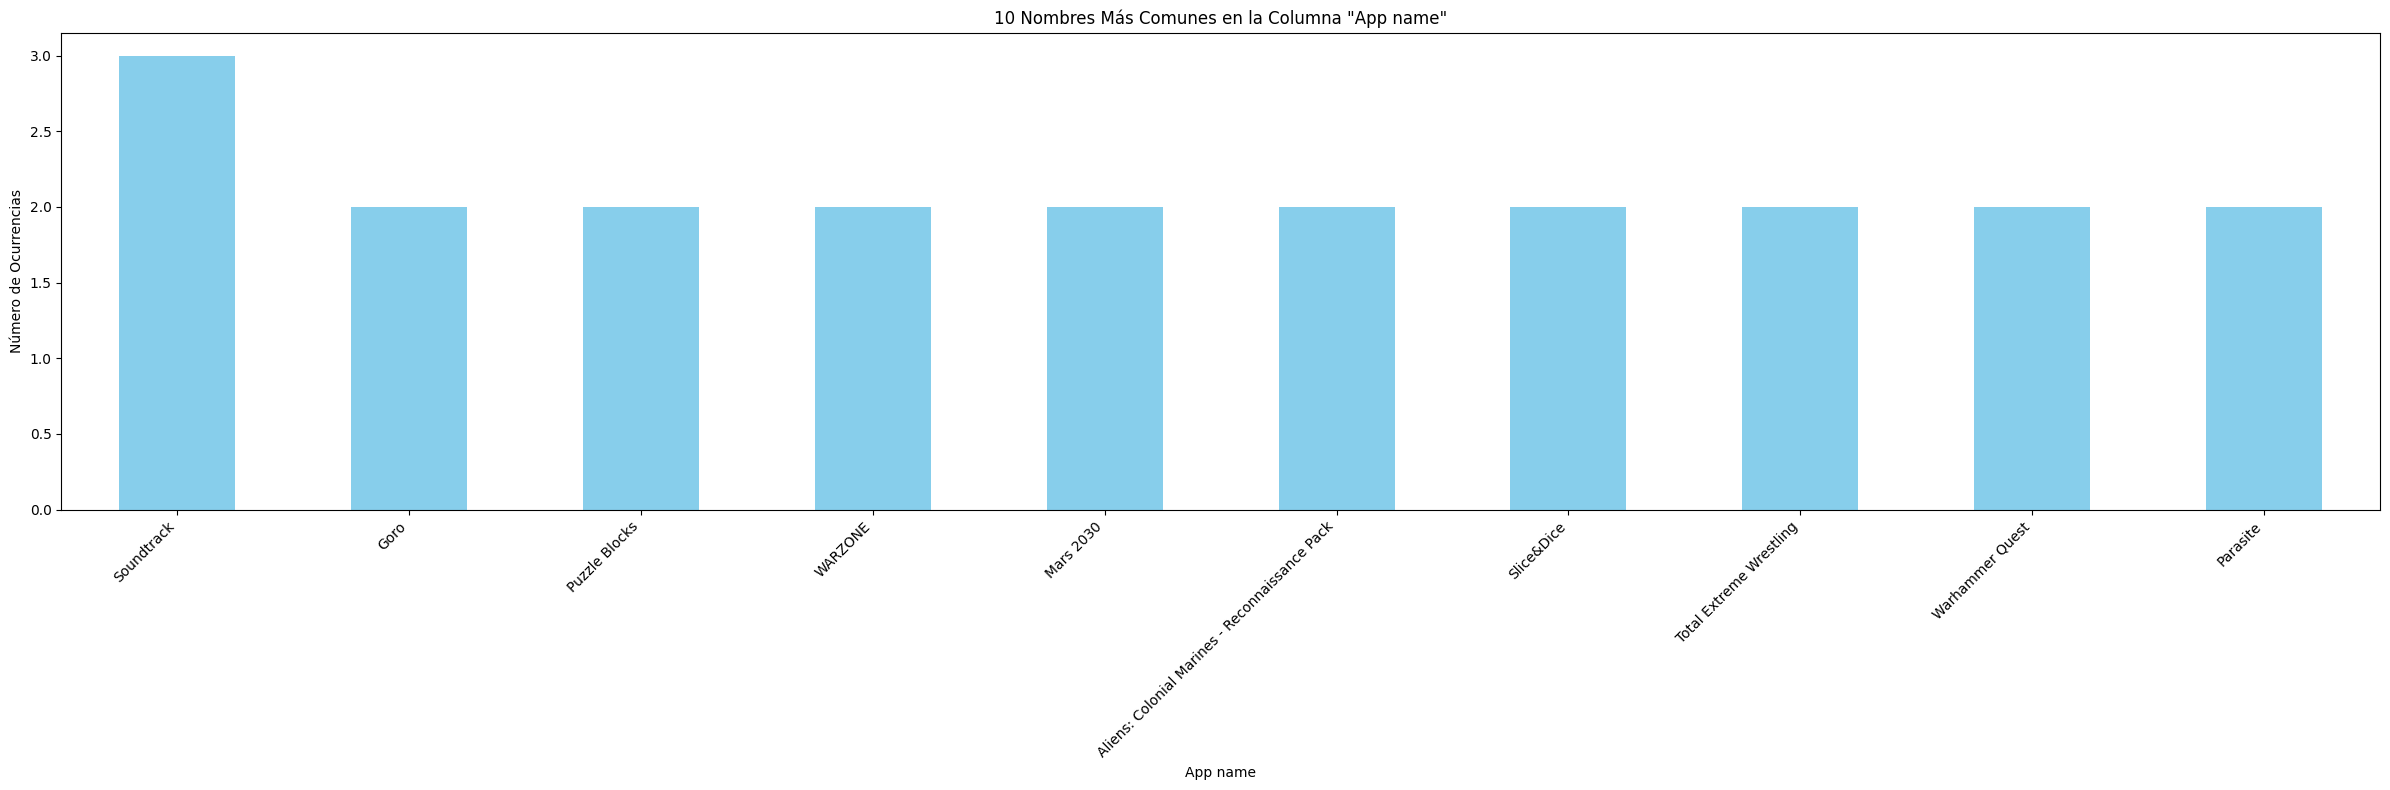

In [56]:
top_app_name = dfsteamgames['app_name'].dropna().value_counts().nlargest(10)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_app_name.plot(kind='bar', color='skyblue')
plt.title('10 Nombres Más Comunes en la Columna "App name"')
plt.xlabel('App name')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor
plt.show()

In [57]:
# verificacion de los valores nulos de la columna 'app name'
dfsteamgames['app_name'].isnull().sum()

2

## Analisis de la columna titulo. 

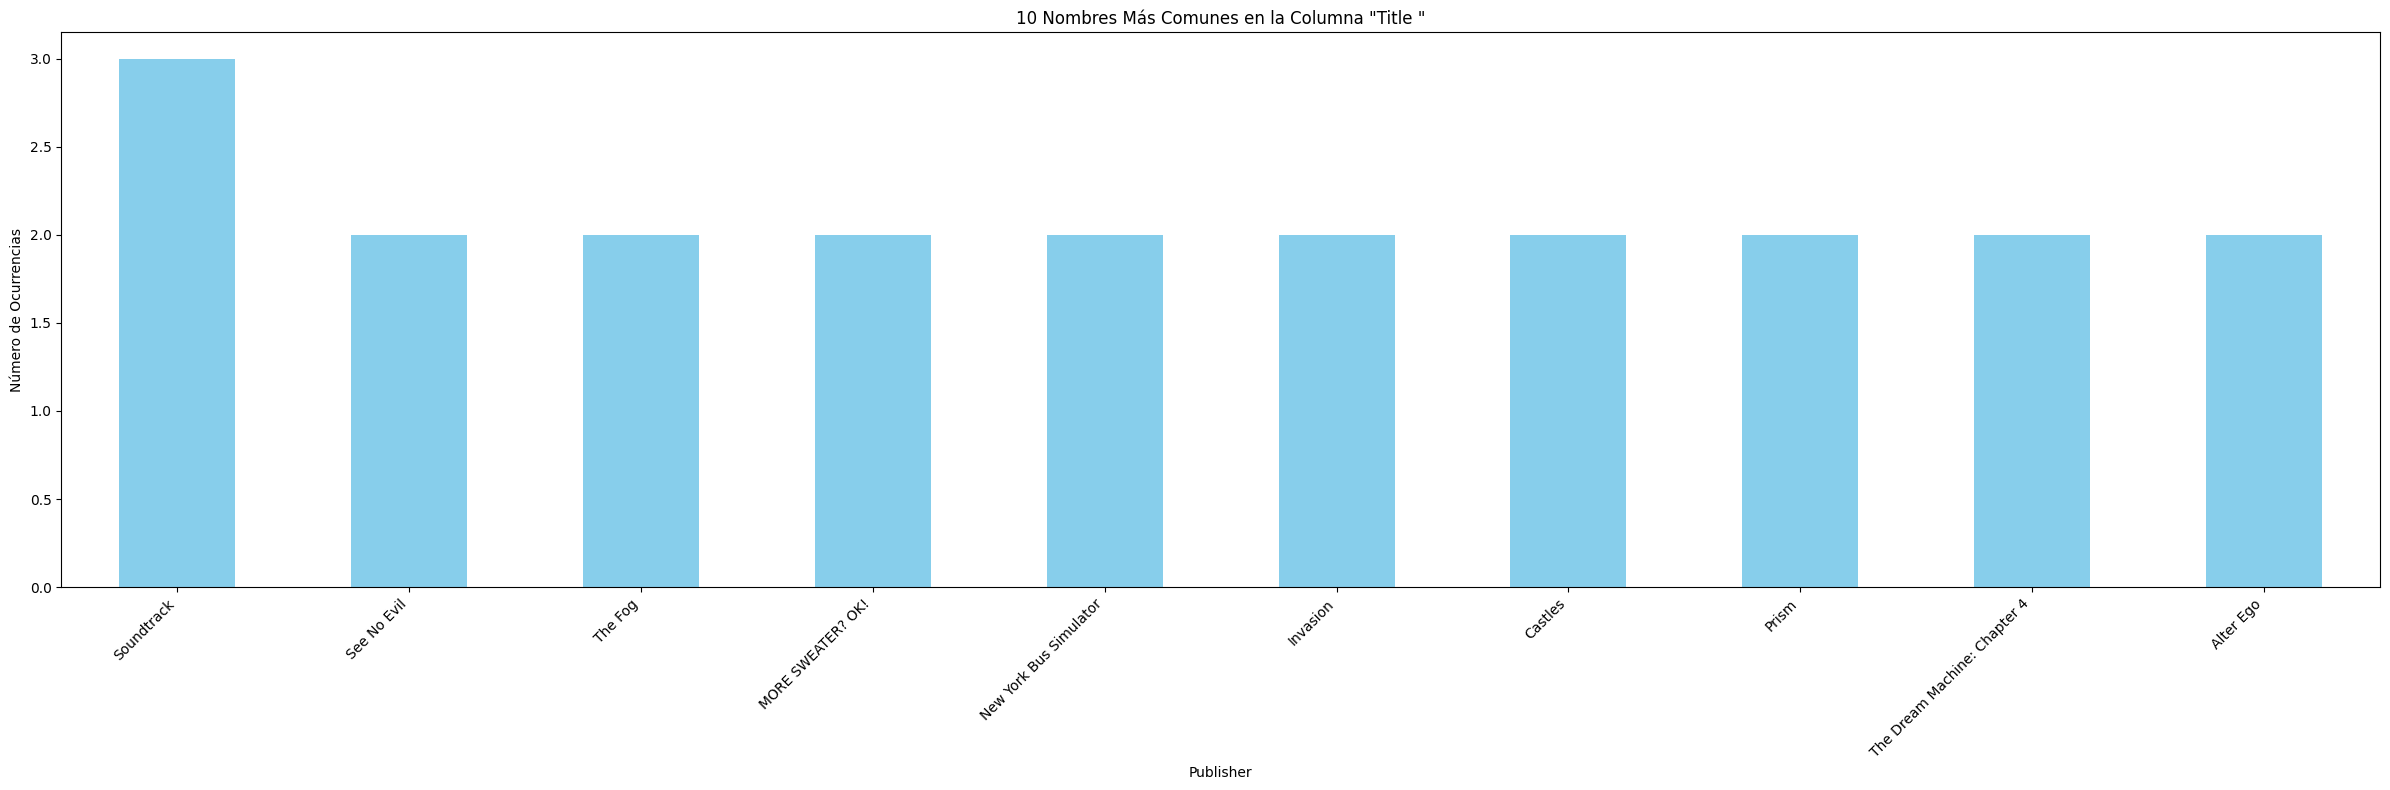

In [58]:
top_tittle = dfsteamgames['title'].dropna().value_counts().nlargest(10)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_tittle.plot(kind='bar', color='skyblue')
plt.title('10 Nombres Más Comunes en la Columna "Title "')
plt.xlabel('Publisher')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor
plt.show()

In [59]:
# Verificacion de los valores nulos de 'title'
dfsteamgames['title'].isnull().sum()

2050

## Analisis de la columna 'release-date'

### Esta primer grafica es antes de hacer la conversion de la columna a formato 'datetime'

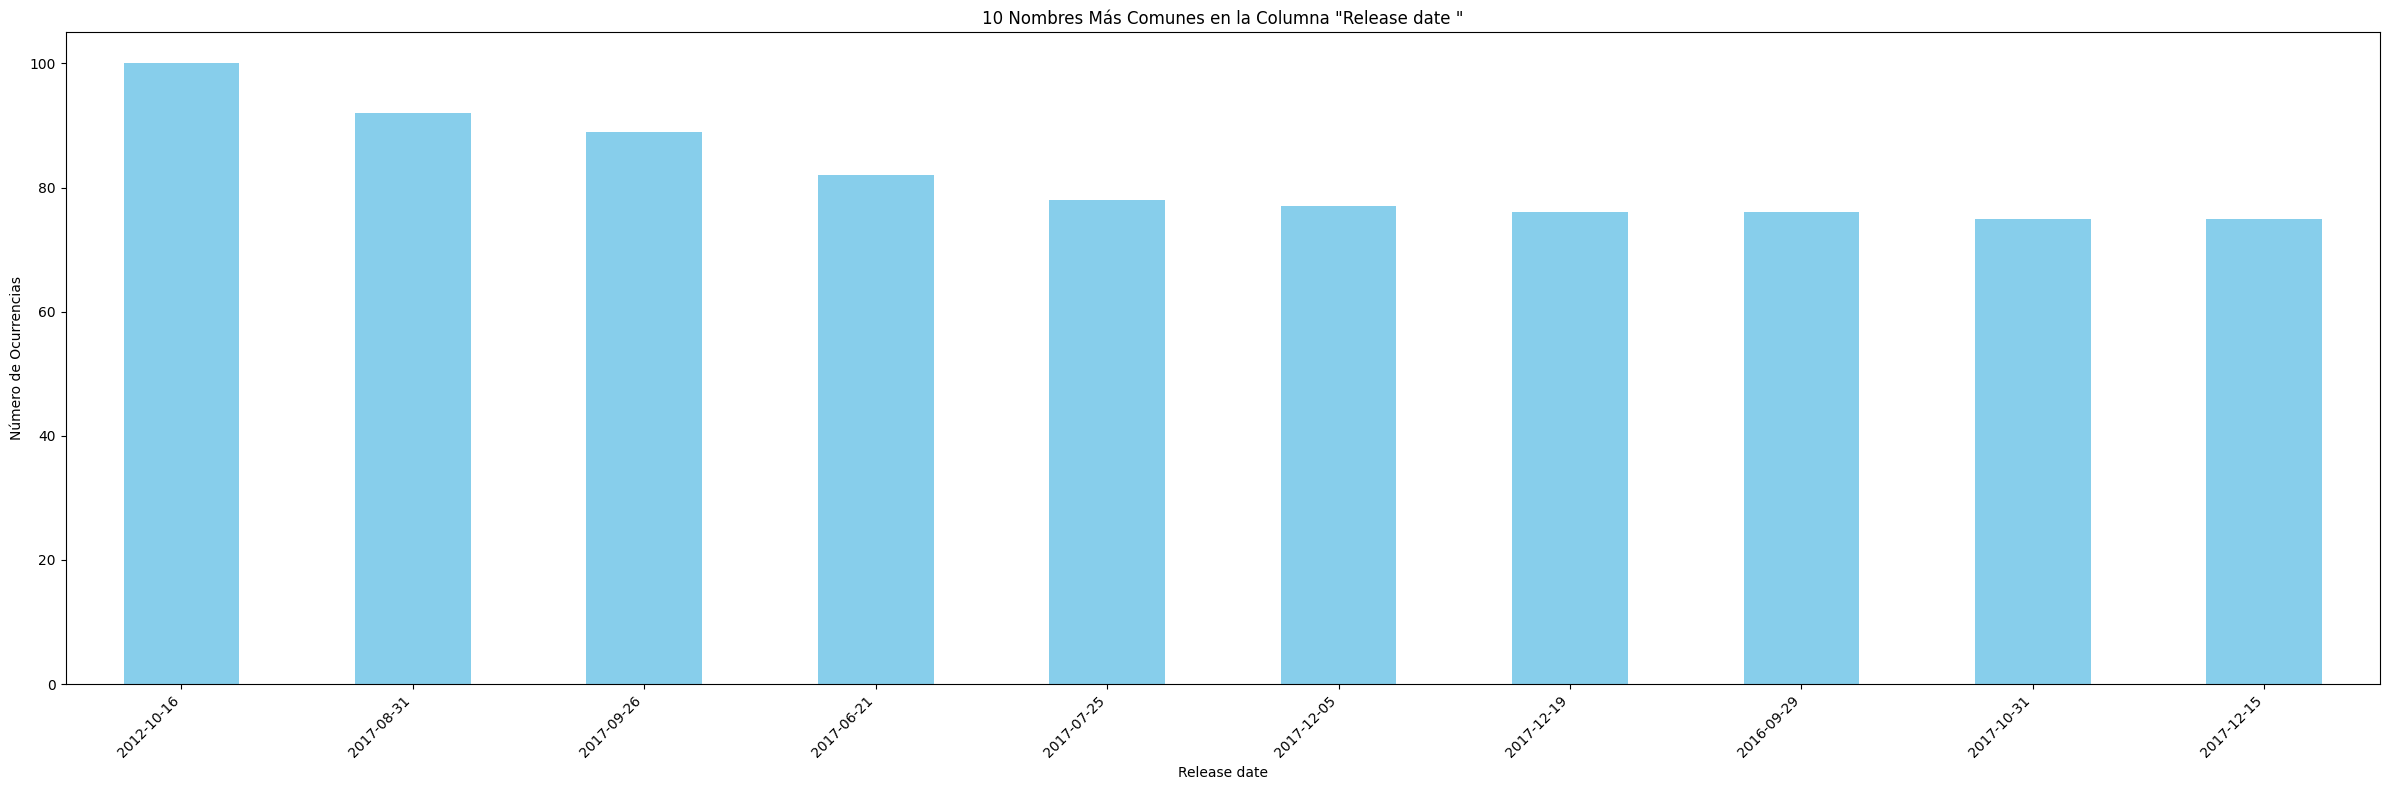

In [60]:
top_releasedate = dfsteamgames['release_date'].dropna().value_counts().nlargest(10)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_releasedate.plot(kind='bar', color='skyblue')
plt.title('10 Nombres Más Comunes en la Columna "Release date "')
plt.xlabel('Release date')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor
plt.show()

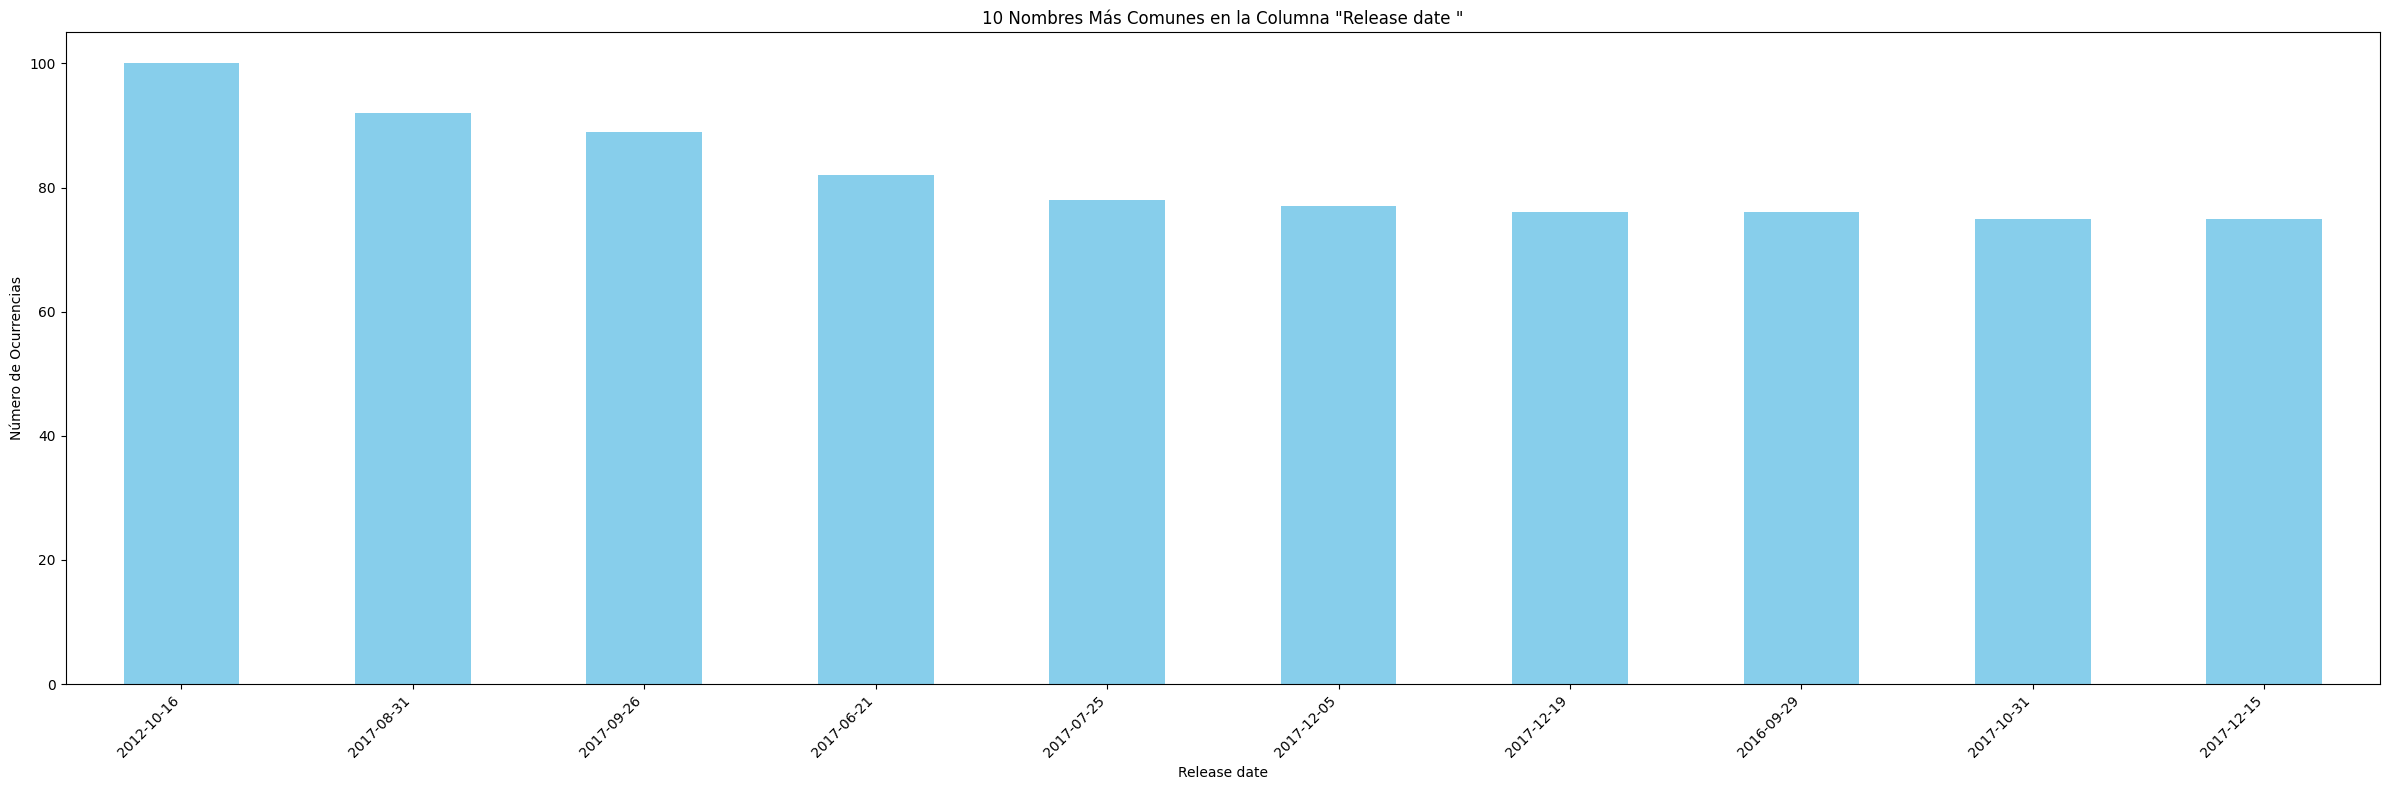

In [61]:
top_releasedate = dfsteamgames['release_date'].dropna().value_counts().nlargest(10)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_releasedate.plot(kind='bar', color='skyblue')
plt.title('10 Nombres Más Comunes en la Columna "Release date "')
plt.xlabel('Release date')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor
plt.show()

## Aqui se hace la conversion de la columna al tipo 'date'

### Como se puede apreciar hay valores atipicos en esta columna.

In [14]:
# Luego, filtramos los valores que no son fechas
invalid_dates = dfsteamgames[pd.to_datetime(dfsteamgames['release_date'], errors='coerce').isna()]['release_date']

# Finalmente, contamos la frecuencia de esos valores
frequency = invalid_dates.value_counts()

#dfsteamgames['release_date'] = pd.to_datetime(dfsteamgames['release_date'], errors='coerce')




# Mostrar la frecuencia de los valores no convertibles a fechas
print(frequency)

release_date
Coming Soon                                                                                   27
2018                                                                                          21
2017                                                                                          20
TBA                                                                                           16
Q1 2018                                                                                       10
                                                                                              ..
"""Soon"""                                                                                     1
0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵     1
Fall 2018                                                                                      1
2018年1月                                                                                        1
January 2018     

## Normalizacion de la columna 'release_date'

In [15]:
def convert_to_datetime(x):
    try:
        return pd.to_datetime(x, format='%Y-%m-%d')
    except Exception:
        return x

dfsteamgames['release_date'] = dfsteamgames['release_date'].apply(convert_to_datetime)


## Chuequeo post normalizacion 

In [16]:
# Luego, filtramos los valores que no son fechas
invalid_dates = dfsteamgames[pd.to_datetime(dfsteamgames['release_date'], errors='coerce').isna()]['release_date']

# Finalmente, contamos la frecuencia de esos valores
frequency = invalid_dates.value_counts()

#dfsteamgames['release_date'] = pd.to_datetime(dfsteamgames['release_date'], errors='coerce')




# Mostrar la frecuencia de los valores no convertibles a fechas
print(frequency)

release_date
Coming Soon                                     27
TBA                                             16
Q1 2018                                         10
Coming soon                                      8
TBD                                              6
                                                ..
C'est bientôt...                    (ou pas)     1
Datachunks conflicted. Be vigiliant.             1
Q2 2018 (Tentative)                              1
Demo is available now!                           1
Q1, 2018                                         1
Name: count, Length: 76, dtype: int64


In [17]:
# Creo una lista para eliminar los valores erroneos de la columna 
to_remove = [
    'Coming Soon', 
    'Coming soon', 
    'TBA', 
    'TBD', 
    "C'est bientôt...                    (ou pas)", 
    "Datachunks conflicted. Be vigiliant." 
    'Demo is available now!'
    'Play Beta in demo!'
]

# Se filtra aqui el DataFrame para eliminar las filas con fechas no deseadas
dfsteamgames = dfsteamgames[~dfsteamgames['release_date'].isin(to_remove)]

In [18]:
# Luego, filtramos los valores que no son fechas
invalid_dates = dfsteamgames[pd.to_datetime(dfsteamgames['release_date'], errors='coerce').isna()]['release_date']

# Finalmente, contamos la frecuencia de esos valores
frequency = invalid_dates.value_counts()

#dfsteamgames['release_date'] = pd.to_datetime(dfsteamgames['release_date'], errors='coerce')




# Mostrar la frecuencia de los valores no convertibles a fechas
print(frequency)

release_date
Q1 2018                                 10
Q4 2017                                  5
Fall 2017                                5
Early 2018                               5
Winter 2017                              5
                                        ..
Datachunks conflicted. Be vigiliant.     1
Q2 2018 (Tentative)                      1
Demo is available now!                   1
Play Beta in demo!                       1
Q1, 2018                                 1
Name: count, Length: 71, dtype: int64


## Aqui se normaliza los valores con mayor frecuencia en la columna, en el resto de los casos opto por eliminarlos al ser un valor infimo en comparacion con el total de los datos 


### Digo infimo porque son un total de 71 valores de un total de mas de 30 mil entradas. 

In [19]:
# Definimos, asi es tu y yo juntos. Una función para transformar las fechas cuatrimestrales
def transform_quarterly_dates(date):
    # Transformación de los valores trimestrales
    if date in ['Q1 2018', 'Q1, 2018','Early 2018']:
        return '2018-01-01'
    elif date == 'Q2 2018 (Tentative)':
        return '2018-05-01'
    elif date in ['Fall 2017','Q4 2017']:
        return '2017-09-01'
    elif date == 'Winter 2017':
        return '2017-05-01'
    # Retornar la fecha original si no se modifica
    return date

In [20]:
dfsteamgames['release_date'] = dfsteamgames['release_date'].apply(transform_quarterly_dates)

In [21]:
# es parecida a la funcion original pero se lo modifica el valor de retorno para que sea nulo 
def convert_to_datetime(x):
    try:
        return pd.to_datetime(x, format='%Y-%m-%d')
    except Exception:
        return None

dfsteamgames['release_date'] = dfsteamgames['release_date'].apply(convert_to_datetime)


### Histograma


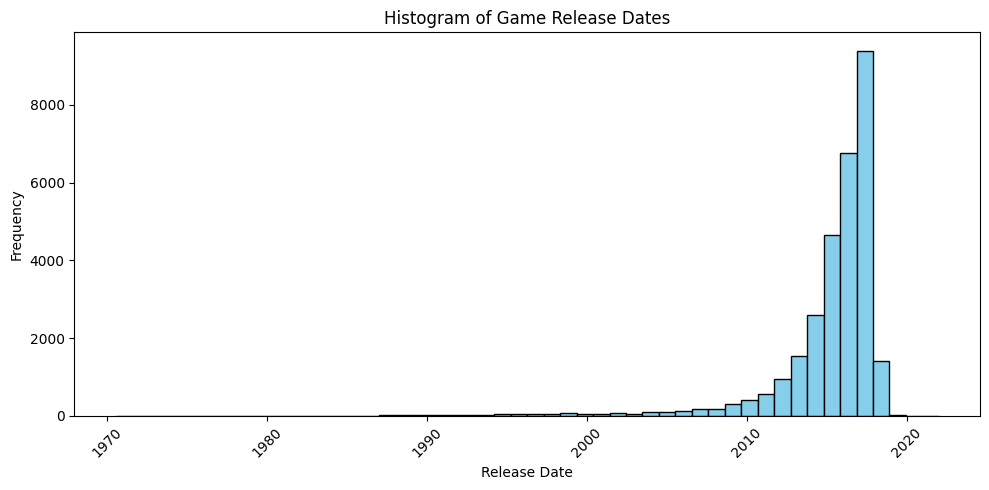

In [70]:
# Plotting the histogram
plt.figure(figsize=(10, 5))
plt.hist(dfsteamgames['release_date'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Game Release Dates')
plt.xlabel('Release Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Se normaliza la columna 'release_date' 

### Se toma como opcion imputar la mediana de los valores 

In [23]:
fecha_median = dfsteamgames['release_date'].median()

In [72]:
print(fecha_median)

2016-04-19 00:00:00


In [24]:
# Este codigo es para llenar los valores faltante mediante imputacion de la media de los valore que ya existen. 
dfsteamgames['release_date'].fillna(fecha_median, inplace=True)

C:\Users\h98go\AppData\Local\Temp\ipykernel_20556\437073570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfsteamgames['release_date'].fillna(fecha_median, inplace=True)


In [182]:
#Creamos las fechas como variables ordinales para poderlas plotear
dfsteamgames['ordinaldates']= dfsteamgames['release_date'].dropna().map(pd.Timestamp.toordinal)


### Exploracion de la columna 'price'

In [74]:
# Este algoritmo hace la busqueda de valores que no se pueden convertir al tipo de dato deseado y los separa para no eliminarlos
invalid_conversion = dfsteamgames[pd.to_numeric(dfsteamgames['price'], errors='coerce').isna()]['price']

# Contar la frecuencia de cada género
frequency_invalid_price = invalid_conversion.value_counts()
print(frequency_invalid_price)


price
Free                             905
Free to Play                     520
Free To Play                     462
Free Mod                           4
Free Demo                          3
Play Now                           2
Third-party                        2
Play for Free!                     2
Play WARMACHINE: Tactics Demo      1
Install Theme                      1
Install Now                        1
Free HITMAN™ Holiday Pack          1
Play the Demo                      1
Starting at $499.00                1
Starting at $449.00                1
Free to Try                        1
Free Movie                         1
Free to Use                        1
Name: count, dtype: int64


# Normalizacion de la columna 'price'

In [26]:
# Con esta funcion se busca la normalizacion a un solo tipo de dato en la columna 
def normalize_price(price):
    # Intentar convertir el valor a minúsculas, si es una cadena de texto
    if isinstance(price, str):
        price = price.lower()

        # Condiciones para valores que representan "gratis"
        if 'free' in price or 'play now' in price or 'play for free' in price or 'install now' in price or 'free to use' in price:
            return 0.0
        # Condiciones para precios específicos
        elif 'starting at $499' in price:
            return 499.00
        elif 'starting at $449' in price:
            return 449.00
        else:
            return np.nan
    # Si ya es un valor numérico (float o int), simplemente lo devolvemos tal cual
    else:
        return price
    

In [27]:
# Aplicamos la función a la columna 'price'
dfsteamgames['price_normalized'] = dfsteamgames['price'].apply(normalize_price)

# Eliminamos las filas que tienen NaN en la columna normalizada
# dfsteamgames_backup = dfsteamgames_backup.dropna(subset=['price_normalized'])

# Mostramos el resultado
print(dfsteamgames[['price', 'price_normalized']])

               price  price_normalized
88310           4.99              4.99
88311   Free To Play              0.00
88312   Free to Play              0.00
88313           0.99              0.99
88314           2.99              2.99
...              ...               ...
120440          1.99              1.99
120441          4.99              4.99
120442          1.99              1.99
120443          4.99              4.99
120444          4.99              4.99

[32075 rows x 2 columns]


In [120]:
dfsteamgames.describe(include='all')

In [118]:
price_saved_column = dfsteamgames[['price']]

In [28]:
# Eliminamos la columna 'price'
dfsteamgames.drop(columns=['price'], inplace=True)

In [112]:
#Backup hasta antes de la normalizacion de price 

dfsteamgames_backup = dfsteamgames.copy()



In [113]:
# Se backuppea en archivo 
dfsteamgames_backup.to_json('dfsteamgames_backup.json', orient='records', lines=True)

# Analisis de la columna 'price'

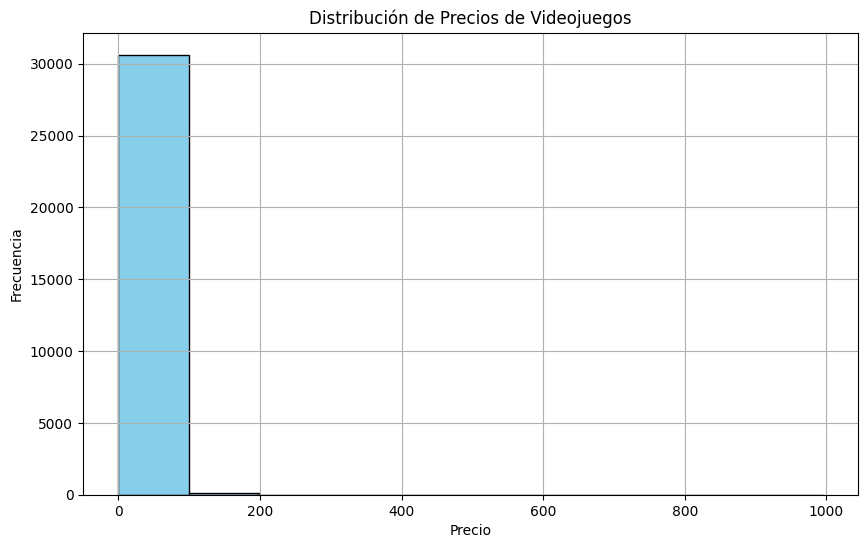

In [29]:
# Graficamos usando matplotlib
plt.figure(figsize=(10,6))
plt.hist(dfsteamgames['price_normalized'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de Videojuegos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

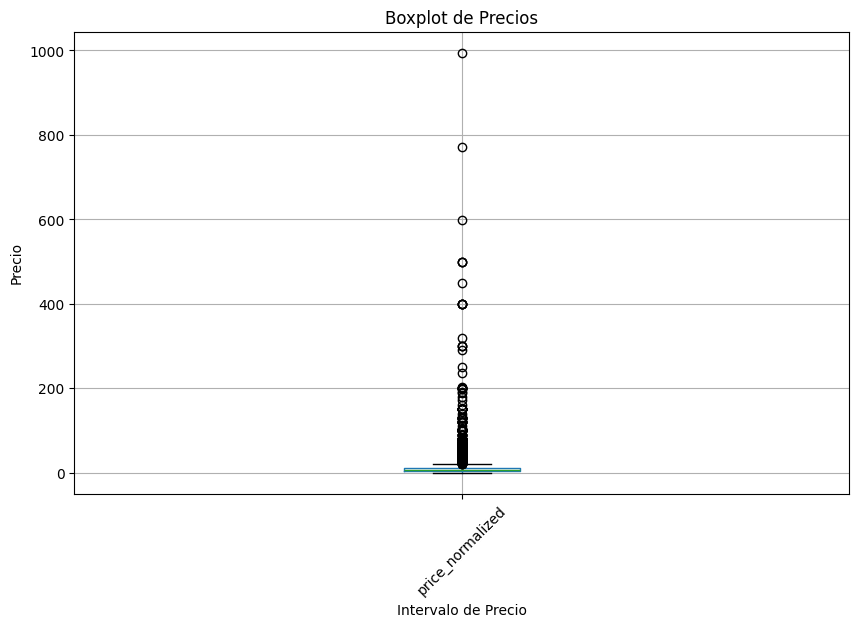

In [30]:
plt.figure(figsize=(10, 6))
dfsteamgames.boxplot(column='price_normalized')
plt.title('Boxplot de Precios')
plt.suptitle('')
plt.xlabel('Intervalo de Precio')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

## Aqui intentamos reducir el rango de precio para poder visualizr la mayor concentracion 

<Figure size 1000x600 with 0 Axes>

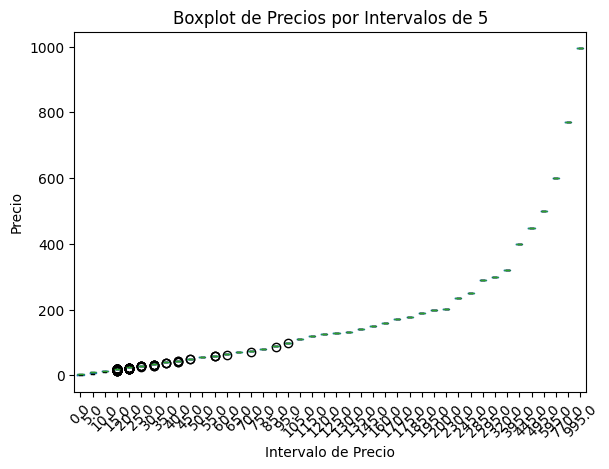

In [80]:
# Filtrar los valores en intervalos de 5
dfsteamgames['price_binned'] = (dfsteamgames['price_normalized'] // 5) * 5

# Crear el boxplot
plt.figure(figsize=(10, 6))
dfsteamgames.boxplot(column='price_normalized', by='price_binned',grid=False)
plt.title('Boxplot de Precios por Intervalos de 5')
plt.suptitle('')
plt.xlabel('Intervalo de Precio')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

In [135]:
moda = dfsteamgames['price_normalized'].mode()
print(moda)

In [137]:
dfsteamgames['price_normalized'].mean()

# Decido usar el metodo de imputacion por mediana para rellenar los valores nulos de la columna 'price, ya que existe un sesgo en la distribucion como se puede observar en los graficos. 

In [31]:
# Calculo la mediana de la columna 'price_normalized', omitiendo los valores nulos
mediana = dfsteamgames['price_normalized'].median()

# Aqui imputo los valores nulos con la mediana
dfsteamgames['price_normalized'].fillna(mediana, inplace=True)

# Y aqui si aún hay valores nulos
print(dfsteamgames['price_normalized'].isnull().sum())

0


C:\Users\h98go\AppData\Local\Temp\ipykernel_20556\4015787545.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfsteamgames['price_normalized'].fillna(mediana, inplace=True)


### Aqui se analiza la columna developer 

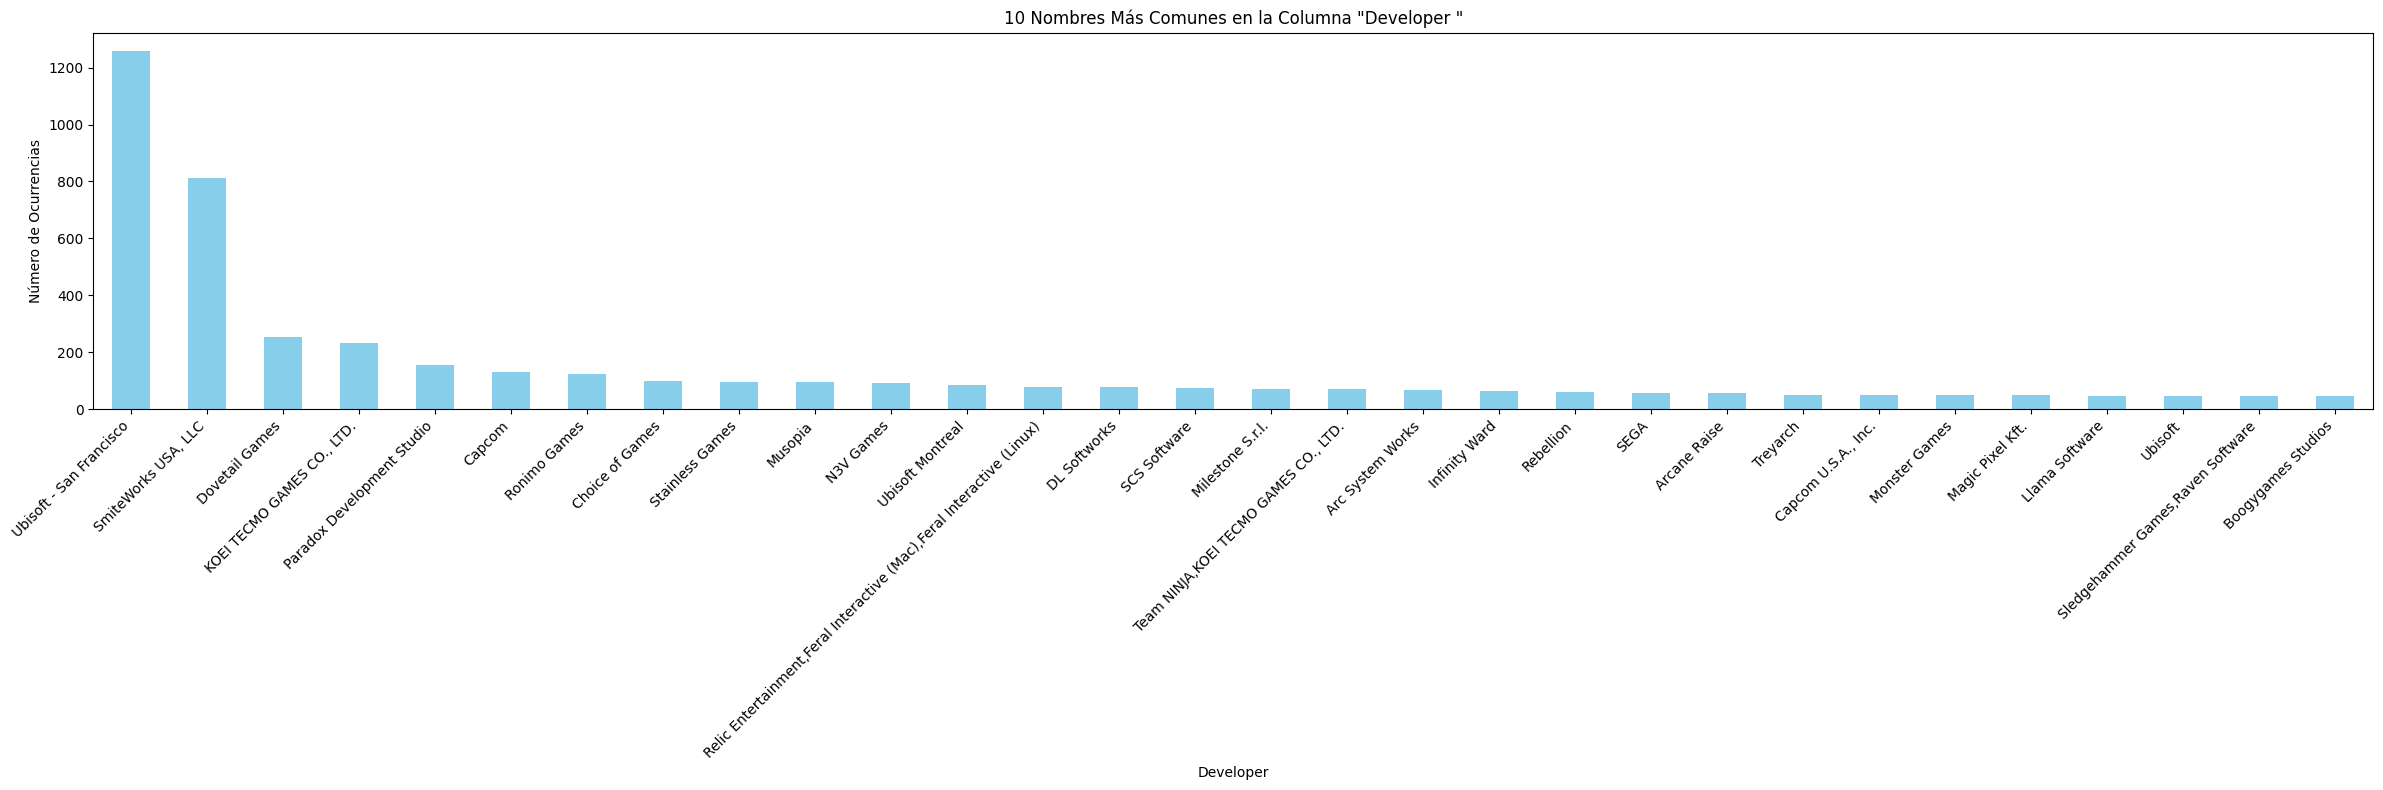

In [82]:
top_developer = dfsteamgames['developer'].dropna().value_counts().nlargest(30)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_developer.plot(kind='bar', color='skyblue')
plt.title('10 Nombres Más Comunes en la Columna "Developer "')
plt.xlabel('Developer')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor
plt.show()

In [83]:
sum_top_developers = top_developer.sum()
print(sum_top_developers) 

4498


In [192]:
dfsteamgames1 = dfsteamgames.copy()

In [194]:
dfsteamgames1.to_json('datasetprueba_proyecto.json',orient='records',lines=True)

## Normalizacion de la columna Developer 

In [84]:
dfsteamgames['developer'].isnull().sum()

3299

### En base a los valores nulos, decido tomar la opcion de llenarlo con 'Otros desarrolladores' ya que su tamaño es reelevante en comparacion al tamaño del dataset 

In [32]:
# Reemplazamos los valores nulos en la columna 'developer'
dfsteamgames['developer'].fillna('Otros desarrolladores', inplace=True)

# Podemos verificar que se hayan reemplazado correctamente los nulos
print(dfsteamgames['developer'].isnull().sum())

0


C:\Users\h98go\AppData\Local\Temp\ipykernel_20556\2049783548.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfsteamgames['developer'].fillna('Otros desarrolladores', inplace=True)


### Backup de la columna developer

In [252]:
# Guardamos una copia de seguridad porque si porque no?
developer_column_saved = dfsteamgames['developer']

In [ ]:
developer_column_saved

### nombres en mayusculas y minusculas normalizados y sin espacios. 

In [33]:
dfsteamgames['developer'] = dfsteamgames['developer'].str.strip()  # Eliminamos espacios en blanco
dfsteamgames['developer'] = dfsteamgames['developer'].str.lower()  # Convertimos todo a minúsculas para evitar diferencias


### Volvemos a graficar la columna developer 

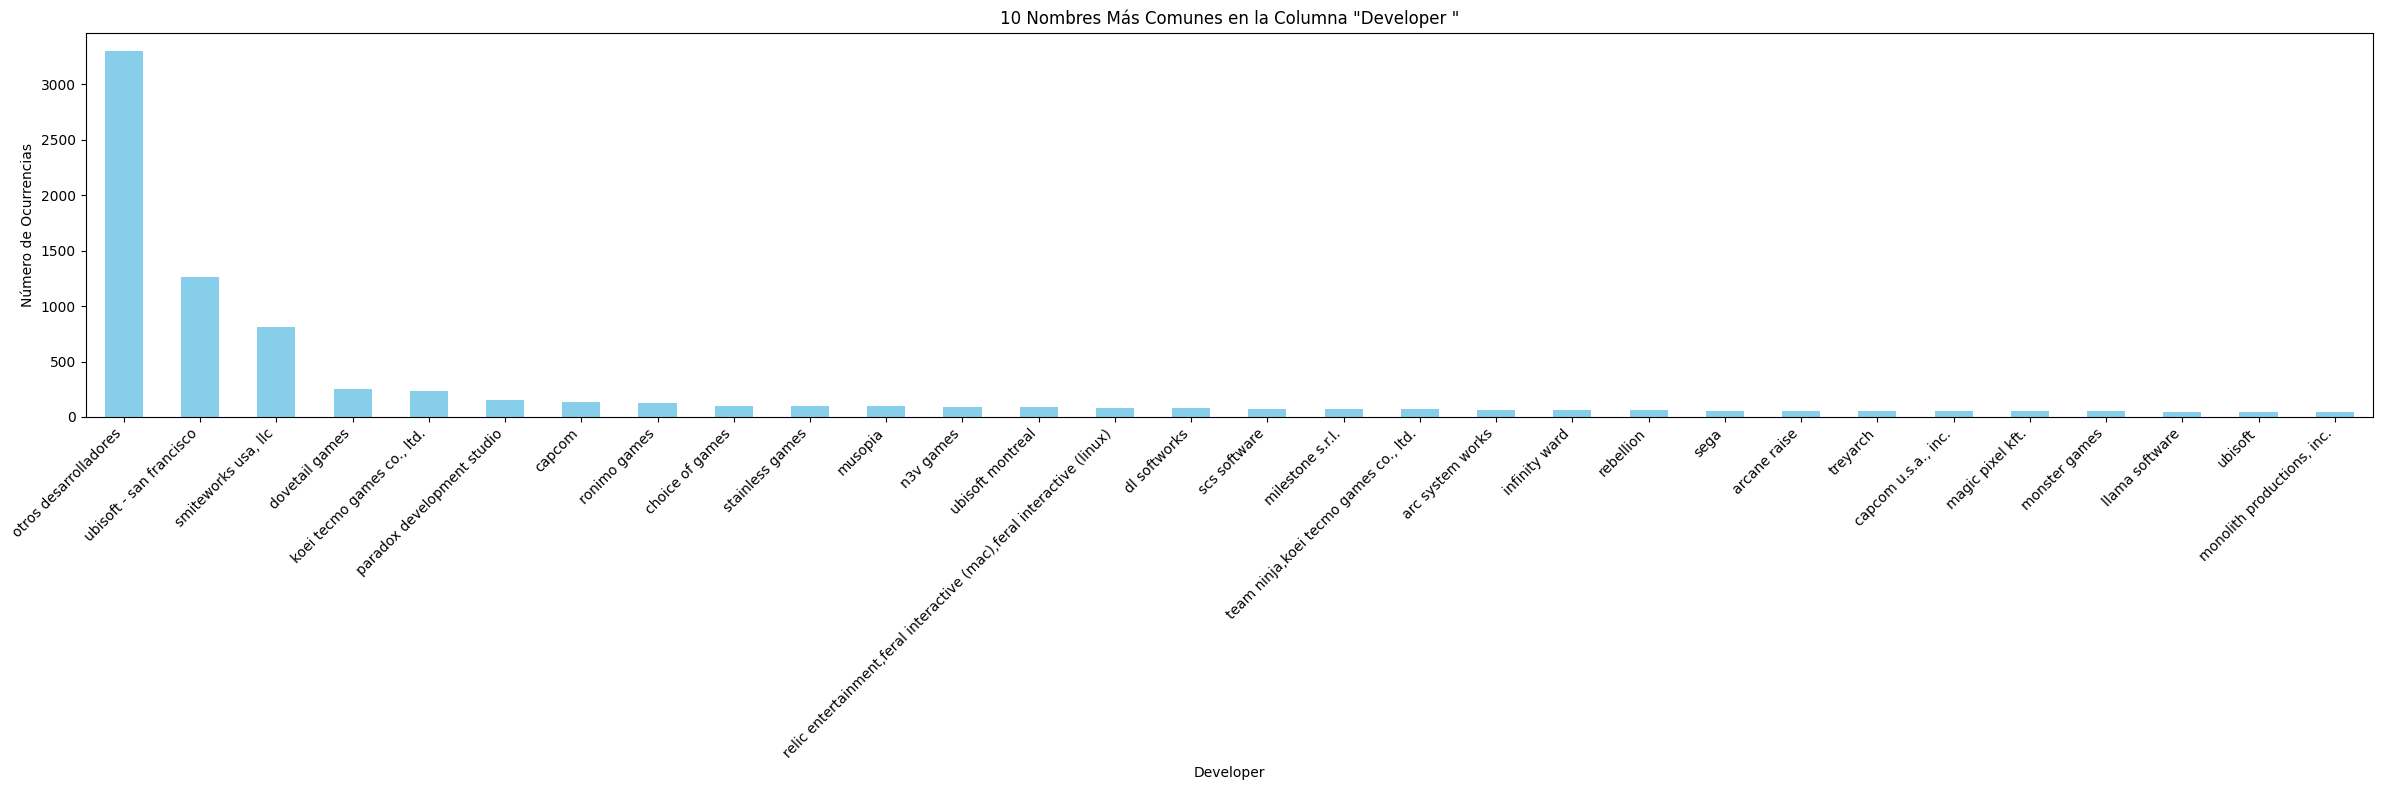

In [35]:
top_developer = dfsteamgames['developer'].dropna().value_counts().nlargest(30)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_developer.plot(kind='bar', color='skyblue')
plt.title('10 Nombres Más Comunes en la Columna "Developer "')
plt.xlabel('Developer')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor
plt.show()

In [36]:
sum_top_developers = top_developer.sum()
print(sum_top_developers) 

7757


### Unimos los valores mas 10 valores mas 'frecuentes' presentes en la columna 

In [37]:
# Lista de valores a unificar bajo 'ubisoft'
ubisoft_variants = ['ubisoft', 'ubisoft montreal', 'ubisoft - san francisco']

# Aqui reemplazamos las variantes de 'ubisoft' con el valor único 'ubisoft'
dfsteamgames['developer'] = dfsteamgames['developer'].replace(ubisoft_variants, 'ubisoft')

In [38]:
# Valores unificados bajo 'capcom'
capcom_variants = ['capcom u.s.a., inc.', 'capcom']

# Unimos las variantes
dfsteamgames['developer'] = dfsteamgames['developer'].replace(capcom_variants,'capcom')


In [39]:
# valores unificados bajo 'koei games'
def unificacion_developer(developer_name):
    if 'koei' in developer_name.lower():
        return 'koei games'
    return developer_name

# Aqui aplicamos la función a la columna 'developer'
dfsteamgames['developer'] = dfsteamgames['developer'].apply(unificacion_developer)

In [40]:
# valores unificados bajo 'dovetail games'
def unificacion_developer(developer_name):
    if 'dovetail' in developer_name.lower():
        return 'dovetail games'
    return developer_name

# Aqui aplicamos la función a la columna 'developer'
dfsteamgames['developer'] = dfsteamgames['developer'].apply(unificacion_developer)

In [41]:
# valores unificados bajo 'smiteworks games'
def unificacion_developer(developer_name):
    if 'smiteworks' in developer_name.lower():
        return 'smiteworks games'
    return developer_name

# Aqui aplicamos la función a la columna 'developer'
dfsteamgames['developer'] = dfsteamgames['developer'].apply(unificacion_developer)

In [42]:
# valores unificados bajo 'relic games'
def unificacion_developer(developer_name):
    if 'relic' in developer_name.lower():
        return 'relic games'
    return developer_name

# Aqui aplicamos la función a la columna 'developer'
dfsteamgames['developer'] = dfsteamgames['developer'].apply(unificacion_developer)

In [43]:
# valores unificados bajo 'sega games'
def unificacion_developer(developer_name):
    if 'sega' in developer_name.lower():
        return 'sega games'
    return developer_name

# Aqui aplicamos la función a la columna 'developer'
dfsteamgames['developer'] = dfsteamgames['developer'].apply(unificacion_developer)

In [44]:
# valores unificados bajo 'paradox games'
def unificacion_developer(developer_name):
    if 'paradox' in developer_name.lower():
        return 'paradox games'
    return developer_name

# Aqui aplicamos la función a la columna 'developer'
dfsteamgames['developer'] = dfsteamgames['developer'].apply(unificacion_developer)

### Graficamos de nuevo la columna 'developer'

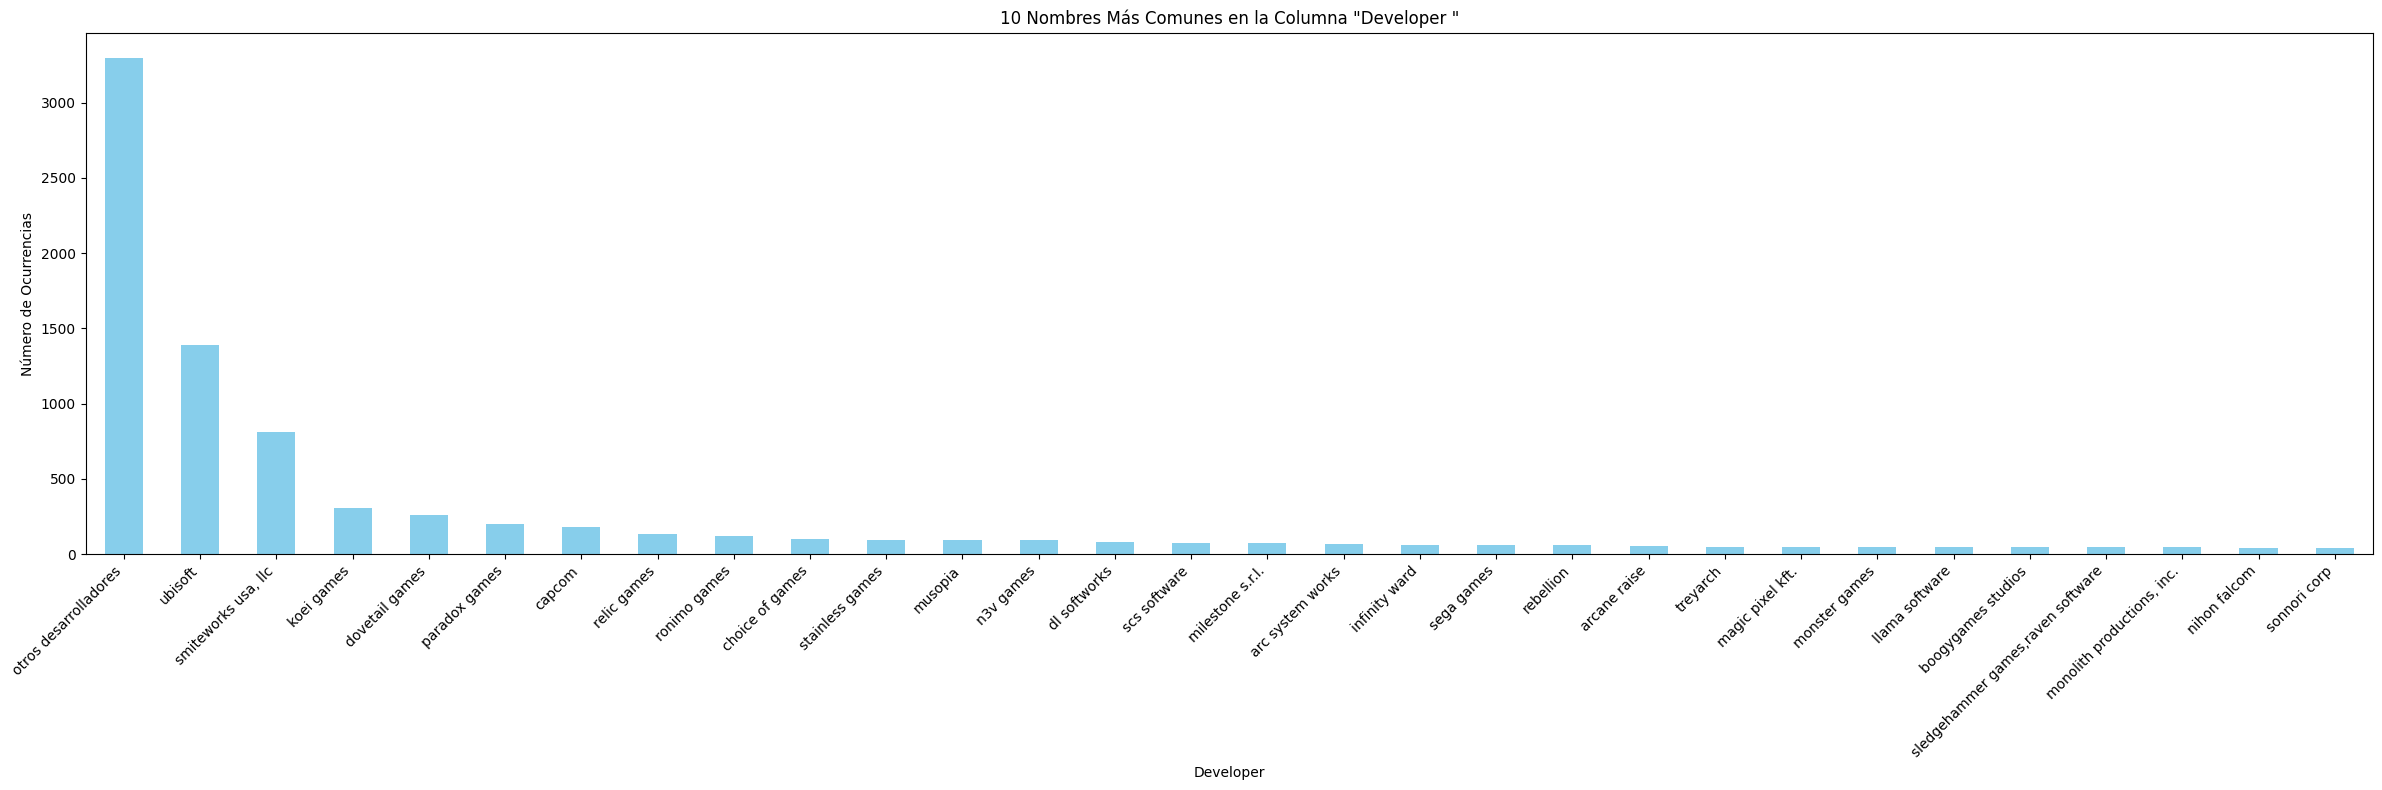

In [96]:
top_developer = dfsteamgames['developer'].dropna().value_counts().nlargest(30)

# Crear el gráfico
plt.figure(figsize=(24, 8))
top_developer.plot(kind='bar', color='skyblue')
plt.title('10 Nombres Más Comunes en la Columna "Developer "')
plt.xlabel('Developer')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta el diseño para que se vea mejor
plt.show()

In [ ]:
dfsteamgames

## Analisis de la teoria de union de las columnas 'publisher y developer. 

### Aunque ambas no representan exactamente lo mismo por objetivos netamente relacionados al proyecto en esta situacion se plantea la union de ambas columnas.

In [97]:
df_iguales = dfsteamgames[dfsteamgames['publisher'] == dfsteamgames['developer']]


In [ ]:
df_iguales

In [98]:
# Aqui contamos las coincidencias
conteo_coincidencias = df_iguales.shape[0]

In [99]:
# Mostrar el número de coincidencias
print(f"Número de coincidencias: {conteo_coincidencias}")

Número de coincidencias: 396


In [100]:
df_diferentes = dfsteamgames[dfsteamgames['publisher'] != dfsteamgames['developer']]


In [101]:
# Aqui contamos las diferencias
conteo_diferencias = df_diferentes.shape[0]

In [203]:
# Aqui es para mostrar el numero de diferencias 
print(f"Número de diferencias: {conteo_diferencias}")

In [ ]:
df_diferentes

In [102]:
print(f'El resultado de la suma de las coincidencias mas las diferencias es: {conteo_coincidencias+conteo_diferencias}')

El resultado de la suma de las coincidencias mas las diferencias es: 32075


In [ ]:
dfsteamgames

## Conclusion, se decide no unir las columnas 'publisher' y 'developer'.

## En base a los requerimientos del proyecto se decide la eliminacion de la columna publisher con el objetivo de reducir la carga no necesaria de datos. 

### Guardo los datos de la columna publiser como backup. 

In [205]:
# Guardado de una copia de seguridad de 'publisher'
publishe_saved_column = dfsteamgames[['publisher']]

In [45]:
# Eliminacion de la columna 'publisher' 
dfsteamgames.drop(columns='publisher',inplace=True)

## Analisis de la teoria de union de las columnas 'app names' y 'title'

In [104]:
# Se comprara los datos entre las columnas 
df_iguales_appandtitle = dfsteamgames[dfsteamgames['app_name'] == dfsteamgames['title']]

In [105]:
# Aqui contamos las coincidencias
conteo_coincidencias_app_and_title = df_iguales_appandtitle.shape[0]

In [106]:
# Mostrar el número de coincidencias
print(f"Número de coincidencias: {conteo_coincidencias_app_and_title}")

Número de coincidencias: 29470


In [107]:
df_iguales_appandtitle

,genres,app_name,title,release_date,tags,id,developer,price_normalized,price_binned
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",761140.0,kotoshiro,4.99,0.0
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",643980.0,secret level srl,0.00,0.0
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",670290.0,poolians.com,0.00,0.0
88313,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",767400.0,彼岸领域,0.99,0.0
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",772540.0,trickjump games ltd,3.99,0.0
...,...,...,...,...,...,...,...,...,...
120439,"[Action, Adventure, Casual, Indie]",Kebab it Up!,Kebab it Up!,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",745400.0,bidoniera games,1.99,0.0
120440,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,2018-01-04,"[Strategy, Indie, Casual, Simulation]",773640.0,"nikita ""ghost_rus""",1.99,0.0
120441,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,2018-01-04,"[Strategy, Indie, Casual]",733530.0,sacada,4.99,0.0
120442,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,2018-01-04,"[Indie, Simulation, Racing]",610660.0,laush dmitriy sergeevich,1.99,0.0


In [108]:
df_diferentes_app_and_title = dfsteamgames[dfsteamgames['app_name'] != dfsteamgames['title']]


In [109]:
# Aqui contamos las diferencias
conteo_diferencias_app_and_title = df_diferentes_app_and_title.shape[0]

In [110]:
# Aqui es para mostrar el numero de diferencias 
print(f"Número de diferencias: {conteo_diferencias_app_and_title}")

Número de diferencias: 2605


In [111]:
print(f'El resultado de la suma de las coincidencias mas las diferencias es: {conteo_coincidencias_app_and_title+conteo_diferencias_app_and_title}')

El resultado de la suma de las coincidencias mas las diferencias es: 32075


In [112]:
dfsteamgames['app_name'].isnull().sum()

2

In [113]:
dfsteamgames['title'].isnull().sum()

2050

### Conclusion, se decide eliminar la columna tittle al estar en un peor estado con mas valores nulos y ser practicamente los mismos datos en comparacion con 'app_name'.  

In [220]:
# Backup de la columna title 
title_saved_column = dfsteamgames[['title']]


In [46]:
# Elimacion de la columna 'title'
dfsteamgames.drop(columns='title',inplace=True)

In [ ]:
dfsteamgames

## Analisis de las columnas 'tags' y 'genre' 

In [115]:
# Se comprara los datos entre las columnas 
df_iguales_tags_and_genre = dfsteamgames[dfsteamgames['genres'] == dfsteamgames['tags']]

In [116]:
# Aqui contamos las coincidencias
conteo_coincidencias_tags_and_genre = df_iguales_tags_and_genre.shape[0]

In [117]:
# Mostrar el número de coincidencias
print(f"Número de coincidencias: {conteo_coincidencias_tags_and_genre}")

Número de coincidencias: 7635


In [118]:
df_iguales_tags_and_genre

,genres,app_name,release_date,tags,id,developer,price_normalized,price_binned
88313,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",767400.0,彼岸领域,0.99,0.0
88316,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",774276.0,poppermost productions,9.99,5.0
88317,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",774277.0,poppermost productions,18.99,15.0
88318,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",774278.0,poppermost productions,29.99,25.0
88326,"[Free to Play, Indie, Simulation, Sports]",SNOW - Starter Pack,2018-01-03,"[Free to Play, Indie, Simulation, Sports]",774271.0,poppermost productions,14.99,10.0
...,...,...,...,...,...,...,...,...
120406,"[Action, Adventure, Casual, Indie, RPG]",PearsAndGrayWitch,2018-01-01,"[Action, Adventure, Casual, Indie, RPG]",766700.0,yaoyichen,4.99,0.0
120408,"[Utilities, Video Production]",CyberLink YouCam 7 Deluxe,2017-12-26,"[Utilities, Video Production]",755310.0,cyberlink,29.99,25.0
120412,[Indie],NeoBalls,2018-01-03,[Indie],771610.0,bjgameind,0.99,0.0
120432,[Indie],Agent X: Equation Rider,2018-01-03,[Indie],767010.0,fred ells,3.99,0.0


In [119]:
# Para encontrar los datos que 'difieren' entre si 
df_diferentes_tags_and_genres = dfsteamgames[dfsteamgames['genres'] != dfsteamgames['tags']]

In [120]:
# Aqui contamos las diferencias
conteo_diferencias_tags_and_genre = df_diferentes_tags_and_genres.shape[0]

In [121]:
# Aqui es para mostrar el numero de diferencias 
print(f"Número de diferencias: {conteo_diferencias_tags_and_genre}")

Número de diferencias: 24440


In [ ]:
df_diferentes_tags_and_genres

In [122]:
# Para comprobar que no haya datos que no existan
print(f'El resultado de la suma de las coincidencias mas las diferencias es: {conteo_coincidencias_tags_and_genre+conteo_diferencias_tags_and_genre}')

El resultado de la suma de las coincidencias mas las diferencias es: 32075


In [123]:
dfsteamgames['genres'].isnull().sum()

3283

In [124]:
dfsteamgames['tags'].isnull().sum()

163

### Conclusion, se decide eliminar la columna genres por peor estado en comparacion con la columna tags, que posee practicamente los mismos datos.

In [232]:
# Backup de la columna genres 
genres_saved_column = dfsteamgames[['genres']]

In [47]:
# Elimacion de la columna 'genres'
dfsteamgames.drop(columns='genres',inplace=True)

In [ ]:
dfsteamgames

### Al ser los valores nulos un pequeño porcentae en funcion del dataset 1% decilo eliminarlos de la columna 'tags'. 

In [48]:
# Para eliminar los valores nulos de la columna 'tags'
dfsteamgames = dfsteamgames.dropna(subset=['tags'])

In [ ]:
dfsteamgames

### Al ser los valores nulos un pequeño porcentae en funcion del dataset [1 literalmente] decido eliminarlos de la columna 'app_name'. 

In [126]:
dfsteamgames['app_name'].isnull().sum()

1

In [49]:
# Para eliminar los valores nulos de la columna 'tags'
dfsteamgames = dfsteamgames.dropna(subset=['app_name'])

In [239]:
dfsteamgames['app_name'].isnull().sum()

## Normalizacion de la columna 'app_name'

In [50]:
dfsteamgames['app_name'] = dfsteamgames['app_name'].str.strip()  # Eliminamos espacios en blanco
dfsteamgames['app_name'] = dfsteamgames['app_name'].str.lower()  # Convertimos todo a minúsculas para evitar diferencias


In [ ]:
dfsteamgames

In [129]:
# Contar las ocurrencias de cada valor en la columna 'app_name'
app_name_counts = dfsteamgames['app_name'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
app_name_counts.plot(kind='bar')

# Etiquetas y título
plt.xlabel('App Name')
plt.ylabel('Count')
plt.title('Bar Chart of App Names in dfsteamgames')

# Mostrar el gráfico
plt.show()

C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36229 (\N{CJK UNIFIED IDEOGRAPH-8D85}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra

KeyboardInterrupt: 

## Visualizacion final del dataset.

In [267]:
dfsteamgames.info()

### Eliminamos columnas extras creadas

In [268]:
# Eliminamos las columnas 
dfsteamgames.drop(columns=['price_binned'],inplace=True)
dfsteamgames.drop(columns=['ordinaldates'],inplace=True)

In [270]:
# Comprobamos la eliminacion 
dfsteamgames.info()

In [269]:
dfsteamgames.describe(include='all')

In [ ]:
dfsteamgames

In [275]:
dfsteamgames.to_json('steamgaes_limpio.json',orient='records',lines=True)

# AQUI TERMINA EL PRIMER DATASET STEAM GAMES

# Comienza el dataset 'user_review'

In [130]:
from pandas import json_normalize
from collections import defaultdict
import pandas as pd

### Primer error en lectura

In [271]:
df_user_reviews = pd.read_json("C:\\Users\\h98go\\Desktop\\Primer proyecto\\drive-download-20241008T191011Z-001\\australian_user_reviews.json",encoding='utf-8', lines=True)

### Uso una variante para leer el archivo directamente 

In [51]:
with open("C:\\Users\\h98go\\Desktop\\Primer proyecto\\drive-download-20241008T191011Z-001\\australian_user_reviews.json", 'r', encoding='utf-8') as file:
    content = file.read()
    print(content[:1000])  # Imprimir los primeros 1000 caracteres para revisar el contenido


{'user_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'reviews': [{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}, {'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': "It's unique and worth a playthrough."}, {'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so

### Se puede observar que la estructura de este dataset es erronea, los pares clave valor deben ir en comillas dobles y estan con comillas simples.

### Se hace un tercer enfoque

In [52]:

# Función para convertir comillas simples a dobles de manera segura
def safe_convert(line):
    try:
        # Evaluar y convertir la línea
        data = eval(line)
        return json.dumps(data)
    except (SyntaxError, ValueError) as e:
        print(f"Error de conversión: {e}")
        return None

# Leer el archivo línea por línea
lines = []
with open("C:\\Users\\h98go\\Desktop\\Primer proyecto\\drive-download-20241008T191011Z-001\\australian_user_reviews.json", 'r', encoding='utf-8') as file:
    for line in file:
        corrected_line = safe_convert(line.strip())
        if corrected_line:
            lines.append(corrected_line)

# Unir las líneas corregidas en una estructura JSON válida
corrected_content = "[" + ",".join(lines) + "]"

# Convertir a un DataFrame de pandas
df_user_reviews = pd.read_json(corrected_content)
print("Archivo JSON procesado y cargado exitosamente.")


Archivo JSON procesado y cargado exitosamente.


C:\Users\h98go\AppData\Local\Temp\ipykernel_20556\3449096797.py:23: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_user_reviews = pd.read_json(corrected_content)


In [9]:
df_user_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


### Tenemos un ganador 


### Desanidamos la columna reviews

In [53]:
# Expande la columna 'reviews', repitiendo filas por cada diccionario en la lista
df_reviews_expanded = df_user_reviews.explode("reviews")
# Convierte cada diccionario en la lista a columnas
df_reviews_expanded = pd.json_normalize(df_reviews_expanded["reviews"])

In [303]:
df_reviews_expanded


In [ ]:
df_user_reviews

#### Aqui dimos con la respuesta a la desanidacion mas o menos 


In [54]:

# Lista para almacenar los resultados
desanidado_data = []

# Iterar por cada fila de reseñas
for idx, row in df_user_reviews.iterrows():
    reviews = row['reviews']
    fila = {}
    for i, review in enumerate(reviews):
        # Crear una entrada para cada campo de la reseña
        for key, value in review.items():
            fila[f'review_{i+1}_{key}'] = value
    desanidado_data.append(fila)

# Convertir la lista de diccionarios a un DataFrame
df_desanidado_optimizado = pd.DataFrame(desanidado_data)



df_desanidado_optimizado.head()


,review_1_funny,review_1_posted,review_1_last_edited,review_1_item_id,review_1_helpful,review_1_recommend,review_1_review,review_2_funny,review_2_posted,review_2_last_edited,...,review_9_helpful,review_9_recommend,review_9_review,review_10_funny,review_10_posted,review_10_last_edited,review_10_item_id,review_10_helpful,review_10_recommend,review_10_review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,,"Posted July 15, 2011.",,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,,"Posted September 8, 2013.",,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,Posted February 3.,,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...,,"Posted December 4, 2015.","Last edited December 5, 2015.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,"Posted October 14, 2013.",,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...,,"Posted July 28, 2012.",,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3 people found this review funny,"Posted April 15, 2014.",,211420,35 of 43 people (81%) found this review helpful,True,Git gud,1 person found this review funny,"Posted December 23, 2013.",,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_desanidado_optimizado

#### Otra opcion de desanidacion (probando)

In [55]:

# Lista para almacenar los resultados
desanidado_data_reviews = []

# Iterar por cada fila de reseñas
for idx, row in df_user_reviews.iterrows():
    reviews = row['reviews']
    fila = defaultdict(list)
    for review in reviews:
        for key, value in review.items():
            fila[key].append(value)
    desanidado_data_reviews.append(dict(fila))

# Convertir la lista de diccionarios a un DataFrame
df_desanidado_optimizado_reviews = pd.DataFrame(desanidado_data_reviews)

NameError: name 'defaultdict' is not defined

#### Comprobamos el metodo 

In [7]:
df_desanidado_optimizado_reviews

In [8]:
#para ver los valores nulos 
df_desanidado_optimizado_reviews.isnull().sum()

### Eliminamos columnas no reelevantes

In [9]:
df_desanidado_optimizado_reviews

In [32]:
df_desanidado_optimizado_reviews.drop(columns=['funny'],inplace=True)

In [33]:
df_desanidado_optimizado_reviews.drop(columns=['posted'],inplace=True)

In [34]:
df_desanidado_optimizado_reviews.drop(columns=['last_edited'],inplace=True)

In [35]:
df_desanidado_optimizado_reviews.drop(columns=['helpful'],inplace=True)

### Backup de la columnas que pienso que se pueden usar 

In [10]:
user_url_revie_backup = df_user_reviews[['user_url']]


In [11]:
funny_backup = df_desanidado_optimizado_reviews[['funny']]

In [12]:
helpful_backup = df_desanidado_optimizado_reviews[['helpful']]

### Eliminamos la columna user url 

In [36]:
df_user_reviews.drop(columns=['user_url'],inplace=True)

### Backup de la columna play2weeks

In [15]:
play2weeks_backup = df_desanidado_optimizado_items[['playtime_2weeks']]

In [27]:
df_user_reviews

In [28]:
df_desanidado_optimizado_reviews

### Combinacion de dataframes 


In [18]:
df_final_user_reviews = pd.concat([df_user_reviews,df_desanidado_optimizado_reviews],axis=1)

In [19]:
df_final_user_reviews

## Tratamiento de valores nulos 

In [20]:
df_final_user_reviews.isnull().sum()

### Se decide eliminar los valores nulos al ser un valor no reelevante en el dataset.

In [21]:
df_final_user_reviews.dropna(inplace=True)

In [20]:
df_final_user_reviews.isnull().sum()

In [43]:
df_final_user_reviews.info()

In [ ]:
df_final_user_reviews

## Eliminacion de la columna 'reviews'

In [22]:
#Backup de la columna 'reviews'
reviews_column_backup = df_final_user_reviews[['reviews']]

#Backup del backup
reviews_column_backup.to_json('backup de la columna reviews.json',orient='records',lines=True)

In [23]:
#Eliminamos la columna 
df_final_user_reviews.drop(columns=['reviews'],inplace=True)

## Desanidamos las columnas anidadas 

In [24]:


# Intentamos una tecnicca parecida para desanidar, conservando los datos usuario id e item count
df_exploded_user_reviews = df_final_user_reviews.explode(['item_id', 'recommend', 'review'], ignore_index=True)




In [25]:
df_exploded_user_reviews

In [26]:
# Medimos la memoria ocupada para que note explote la compu 
memoria = df_exploded_user_reviews.memory_usage(deep=True).sum()

print(f"El DataFrame utiliza aproximadamente {memoria / (1024 ** 2):.2f} MB.")


### Normalizamos columna 'review'

In [27]:
df_exploded_user_reviews['review normalized'] = df_exploded_user_reviews['review'].str.lower()

In [28]:
df_exploded_user_reviews['review normalized'].nunique()

### Hacemoms backup de review

In [29]:
review_column_backup= df_exploded_user_reviews[['review']]

### Eliminamos columna 'review'

In [30]:
### Eliminamos columna 'review'
df_exploded_user_reviews.drop(columns=['review'],inplace=True)

## Fin del 2do dataset 

# Comienzo del tercer dataset 

### Esperamos que se haya aprendido y aplicamos el metodo de importacion directa 


In [10]:
import json

# Aqui la funcion es para leer el archivo línea por línea
lines1 = []
with open("C:\\Users\\h98go\\Desktop\\Primer proyecto\\drive-download-20241008T191011Z-001\\australian_users_items.json", 'r', encoding='utf-8') as file1:
    for line1 in file1:
        corrected_line1 = safe_convert(line1.strip())
        if corrected_line1:
            lines1.append(corrected_line1)

# Unir las líneas corregidas en una estructura JSON válida
corrected_content_australian_items= "[" + ",".join(lines1) + "]"

# Convertir a un DataFrame de pandas
df_user_items = pd.read_json(corrected_content_australian_items)
# Metemos un estimulo visual para motivarnos que se estan haciendo bien las cosas
print("Archivo JSON procesado y cargado exitosamente.")


C:\Users\h98go\AppData\Local\Temp\ipykernel_340\3874086384.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_user_items = pd.read_json(corrected_content_australian_items)


Archivo JSON procesado y cargado exitosamente.


In [32]:
df_user_items

### Eliminacion y backup de columnas irrelevantes 

#### Eliminacion 

In [33]:
df_user_items.drop(columns=['user_url'],inplace=True)
df_user_items.drop(columns=['steam_id'],inplace=True)


In [ ]:
df_user_items

#### 1era desanidacion 

In [11]:
# Expande la columna 'items', repitiendo filas por cada diccionario en la lista
df_columna_items_expanded = df_user_items.explode("items")
# Convierte cada diccionario en la lista a columnas
df_columna_items_expanded = pd.json_normalize(df_columna_items_expanded["items"])

In [331]:
df_columna_items_expanded.info()

In [12]:
df_columna_items_expanded

#### 2do desanidado 

In [11]:
from collections import defaultdict
import pandas as pd

# Lista para almacenar los resultados
desanidado_data_items = []

# Iterar por cada fila de reseñas
for idx, row in df_user_items.iterrows():
    reviews = row['items']
    fila = defaultdict(list)
    for review in reviews:
        for key, value in review.items():
            fila[key].append(value)
    desanidado_data_items.append(dict(fila))

# Convertir la lista de diccionarios a un DataFrame
df_desanidado_optimizado_items = pd.DataFrame(desanidado_data_items)


In [12]:
df_desanidado_optimizado_items

,item_id,item_name,playtime_forever,playtime_2weeks
0,"[10, 20, 30, 40, 50, 60, 70, 130, 300, 240, 38...","[Counter-Strike, Team Fortress Classic, Day of...","[6, 0, 7, 0, 0, 0, 0, 0, 4733, 1853, 333, 75, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[10, 80, 100, 300, 30, 40, 60, 240, 280, 360, ...","[Counter-Strike, Counter-Strike: Condition Zer...","[0, 0, 0, 220, 0, 0, 0, 62, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1200, 1230, 1280, 1520, 220, 320, 340, 360, 3...","[Red Orchestra: Ostfront 41-45, Mare Nostrum, ...","[923, 0, 0, 158, 1323, 0, 90, 0, 234, 113, 507...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[10, 20, 30, 40, 50, 60, 70, 130, 80, 100, 300...","[Counter-Strike, Team Fortress Classic, Day of...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 67, 2304, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[300, 20, 50, 70, 130, 10, 30, 40, 60, 80, 100...","[Day of Defeat: Source, Team Fortress Classic,...","[1131, 89, 178, 108, 313, 93, 16, 4, 0, 13, 47...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
88305,"[413850, 413851, 413852, 413853, 413854, 41385...","[CS:GO Player Profiles, CS:GO Player Profiles:...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
88306,"[11020, 6370, 13140, 51100, 107900, 113400, 20...","[TrackMania Nations Forever, Bloodline Champio...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
88307,NaN,NaN,NaN,NaN
88308,"[304930, 227940, 346330, 373330, 388490, 52157...","[Unturned, Heroes & Generals, BrainBread 2, Al...","[677, 43, 0, 0, 3, 4, 3]","[677, 43, 0, 0, 3, 4, 3]"


#### No puede correr el codigo con los recursos actuales y el tamaño actual del dataset

In [ ]:
df_desanidado_optimizado_items.describe(include='all')

In [ ]:
df_desanidado_optimizado_items.describe()

### Eliminacion de columnas no reelevantes 

In [13]:
df_desanidado_optimizado_items.drop(columns=['playtime_2weeks'],inplace=True)

### Verificacion de los datasets

In [37]:
df_user_items

In [38]:
df_desanidado_optimizado_items

## Union de los datasets (muy importante)

In [14]:
df_final_user_items = pd.concat([df_user_items,df_desanidado_optimizado_items],axis=1)

In [35]:
df_final_user_items

## Tratamiento de valores nulos 

In [40]:
df_final_user_items.isnull().sum()

### Se decide eliminar los valores nulos, porque pese a ser un porcentaje reelevante, esos datos son 'datos basura', completamente nulos, pertenecen a datos que no aportan ningun valor al proyecto.

In [15]:
df_final_user_items.dropna(inplace=True)

In [37]:
df_final_user_items.isnull().sum()

In [ ]:
df_final_user_items

## Elimino columna 'items' al ser una columna repetida 

In [38]:
#Backup de la columna 'reviews'
items_column_backup = df_final_user_items[['items']]

#Backup del backup
items_column_backup.to_json('backup de la columna items.json',orient='records',lines=True)

In [16]:
#Eliminamos la columna 
df_final_user_items.drop(columns=['items'],inplace=True)

In [54]:
df_final_user_items.to_json('user_item medio limpio.json',orient='records',lines=True)

In [ ]:
df_final_user_items

## Desanimos las columnas anidadas

In [17]:


# Intentamos una tecnicca parecida para desanidar, conservando los datos usuario id e item count
df_exploded_user_items = df_final_user_items.explode(['item_id', 'item_name', 'playtime_forever'], ignore_index=True)




In [ ]:
df_exploded_user_items

In [44]:
# Medimos la memoria ocupada para que note explote la compu 
memoria = df_exploded_user_items.memory_usage(deep=True).sum()

print(f"El DataFrame utiliza aproximadamente {memoria / (1024 ** 2):.2f} MB.")


### Convertimos la columna 'playtime' a numerica como corresponde

In [18]:
#Convertimos la columna a su tipo de dato
df_exploded_user_items['playtime_forever'] = df_exploded_user_items['playtime_forever'].astype(float)


In [49]:
df_exploded_user_items['playtime_forever']

### Convertimos la columna 'items_count' a numerica 

In [19]:
df_exploded_user_items['items_count'] = df_exploded_user_items['items_count'].astype(int)


In [51]:
df_exploded_user_items['items_coun']

### Convertimos la columna 'item_id'

In [20]:
df_exploded_user_items['item_id'] = df_exploded_user_items['item_id'].astype(int)


In [53]:
df_exploded_user_items['item_id']

In [ ]:
df_exploded_user_items

### Normalizamos columna 'item_name'

In [21]:
#noemalizacion de la columna 
df_exploded_user_items['item name normalized'] = df_exploded_user_items['item_name'].str.lower().str.replace(" ", "")

In [59]:
df_exploded_user_items['item name normalized'].nunique()

### Hacemos backup de la columna 'item name'

In [64]:
# Hacemos backup de la columna 'review'
item_name_column_backup = df_exploded_user_items[['item_name']]

### Eliminamos la columna item name

In [22]:
df_exploded_user_items.drop(columns=['item_name'],inplace=True)

# Aqui termina el tercer dataset

# Aqui comienza el feature enginerring para hacer el analisis de sentimientos 

### Se instalan las librerias necesarias (textblob, nltk)

In [23]:
#importamos las librerias 
from textblob import TextBlob
import pandas as pd
from textblob import TextBlob
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
# Descargamos los recursos necesarios de nltk para mejorar el procesamiento de las palabras 
nltk.download('stopwords')
nltk.download('wordnet')

# Inciamos el objeto
# Decido usar los 4 idiomas mas hablados en el mundo para analizar este caso 
languages = ['english', 'spanish', 'chinese', 'arabic']
stop_words = set()
for lang in languages:
    stop_words.update(stopwords.words(lang))
lemmatizer = WordNetLemmatizer()

# Intentamos estandarizar mediante el uso de librerias de nlp.
def normalize_text(y):
    if pd.isna(y) or y.strip() == "":
        return y  # Devuelve el texto si está vacío o es NaN
    # Convertimos a minúsculas el texto
    y = y.lower()
    # Esto es un codigo de generazicion (que se ha hecho como una especie de convenio de uso para nlp)
    y = re.sub(r'[^a-z\s]', '', y)
    # se eliminan los stopowords
    y = ' '.join([word for word in y.split() if word not in stop_words])
    # Hacemos el proceso de lematizacion (reducir las palabras a su forma base)
    y = ' '.join([lemmatizer.lemmatize(word) for word in y.split()])
    return y




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h98go\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\h98go\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
# Normalizamos las reseñas PARA ESTE CASO DE ANALISIS DE SENTIMIENTO. 
df_reviews['normalized_review'] = df_reviews['review normalized'].apply(normalize_text)

In [84]:
# Hacemos el anaalisis de sentimiento sobre la columna sin procesamiento con herramientas nlp
df_reviews['sentiment_analysis2'] = df_reviews['review normalized'].apply(get_sentiment)

In [ ]:
df_reviews

### Analizamos ambos casos comparando su efectividad 

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Función para convertir la recomendación (True/False) en valores de 0 (negativo) o 2 (positivo)
def map_recommend_to_sentiment(recommend):
    return 2 if recommend else 0

# Crear una nueva columna con las recomendaciones convertidas a sentimientos (0 = no recomienda, 2 = recomienda)
df_reviews['true_sentiment_from_recommend'] = df_reviews['recommend'].apply(map_recommend_to_sentiment)

# Filtrar solo las reseñas donde el sentimiento es negativo o positivo (ignorar los neutrales si así lo decides)
df_filtered = df_reviews[df_reviews['sentiment_analysis2'] != 1]

# Variables para los valores reales y predichos (sin neutrales)
y_true = df_filtered['true_sentiment_from_recommend']
y_pred = df_filtered['sentiment_analysis2']

# Evaluar las métricas de rendimiento
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 2], yticklabels=[0, 2])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment from Recommend')
plt.title('Confusion Matrix')
plt.show()


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Función para convertir la recomendación (True/False) en valores de 0 (negativo) o 2 (positivo)
def map_recommend_to_sentiment(recommend):
    return 2 if recommend else 0

# Crear una nueva columna con las recomendaciones convertidas a sentimientos (0 = no recomienda, 2 = recomienda)
df_reviews['true_sentiment_from_recommend'] = df_reviews['recommend'].apply(map_recommend_to_sentiment)

# Filtrar solo las reseñas donde el sentimiento es negativo o positivo (ignorar los neutrales si así lo decides)
df_filtered = df_reviews[df_reviews['sentiment_analysis'] != 1]

# Variables para los valores reales y predichos (sin neutrales)
y_true = df_filtered['true_sentiment_from_recommend']
y_pred = df_filtered['sentiment_analysis']

# Evaluar las métricas de rendimiento
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 2], yticklabels=[0, 2])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment from Recommend')
plt.title('Confusion Matrix')
plt.show()


### Conclusion, como podemos observar aunque por poco las herramientas de nlp usadas en este caso empeoran el funcionamiento del algoritmo para analisis de sentimiento.

### Eliminamos las columnas menos efectivas 

In [101]:
# Eliminamos las columnas de review como se pide en el proyecto 
df_reviews.drop(columns=['review normalized'],inplace=True)
df_reviews.drop(columns=['normalized_review'],inplace=True)

In [102]:
df_reviews.drop(columns=['sentiment_analysis'],inplace=True)

In [ ]:
df_reviews

# Aqui termina el analisis de sentimientos

# Aqui comienza la union de los dataset para las funciones a ejecutarse 

### Cargamos los datase con los que vamos a trabajar 

In [25]:
# Cargamos el archivo json 
datos = []
with open('steamgaes_limpio.json') as archivo:
    for x in archivo:
        datos.append(json.loads(x))
# Convertimos el archivo a dataframe
df_juegos = pd.DataFrame(datos)

In [75]:
df_juegos.info()

### Cambiamos el nombre de las columnas para que no haya problemas al momento de unir los archivos 

In [26]:
# Cambiamos el nombre de las columnas que nos interesan
df_juegos.rename(columns={'id': 'item_id', 'tags': 'generos del juego', 'app_name': 'nombre_del_juego'}, inplace=True)

### Hacemos coincidir el tipo de dato de las columnas o hay tabla.

In [27]:
df_juegos['release_date']= df_juegos['release_date'].astype('date64[pyarrow]')

In [ ]:
df_juegos

In [30]:
#primero un backup porque nunca esta demas 
df_items = df_exploded_user_items.copy()
df_reviews = df_exploded_user_reviews.copy()

NameError: name 'df_exploded_user_reviews' is not defined

In [28]:
# Se cambia a entero porque no hay valores decimales en item_id
df_juegos['item_id'] = df_juegos['item_id'].astype(int)


In [84]:
df_juegos.info()

In [87]:
df_items.info()

In [29]:
# Cambiamos el tipo de columna del dataet para evitar errorres.
df_reviews['item_id'] = df_reviews['item_id'].astype(int)


NameError: name 'df_reviews' is not defined

In [ ]:
df_reviews

### Unimos df_juegos y df_items para crear dataset para funcion DEVELOPER 

In [56]:
# unimos los datasets en este caso para la funcion 'developer'
df_funcion_developer = pd.merge(df_juegos [['item_id', 'developer','price_normalized']], df_items[['item_id', 'items_coun']], on='item_id', how='inner')

In [58]:
df_funcion_developer.info()

In [115]:
df_funcion_developer

In [57]:
# Comprobamos el peso del archivo (para llorar un rato)
df_funcion_developer_size = df_funcion_developer.memory_usage(deep=True).sum() / (1024 ** 2)
print(f'El DataFrame pesa aproximadamente {df_funcion_developer_size:.2f} MB')

### Unimos los df para crear el dataset para la funcion USERDATA

In [94]:
df_reviews.info()

In [99]:
# unimos los datasets en este caso para la funcion 'userdata'
df_funcion_userdata_primeraunion= pd.merge(df_reviews [['item_id', 'user_id','recommend']], df_juegos[['item_id', 'price_normalized']], on='item_id', how='inner')

In [100]:
# Verificamos las columnas en el nuevo dataset 
df_funcion_userdata_primeraunion.info()

In [1]:
df_funcion_userdata_primeraunion

In [103]:
#h Hacemos la union final de los archivos
df_funcion_userdata_final = pd.merge(df_funcion_userdata_primeraunion[['item_id','user_id','recommend','price_normalized']], df_items[['item_id','items_coun']], on='item_id', how='inner'
)

In [ ]:
# Verificamos el nuevo dataset
df_funcion_userdata_final.info()

### Unimos los df para crear el dataset para la funcion USERFORGENRE

In [59]:
df_funcion_USERFORGENRE= pd.merge(df_items [['item_id', 'user_id','playtime_forever']], df_juegos[['item_id', 'generos del juego','release_date']], on='item_id', how='inner')

In [60]:
# Verificamos el nuevo archivo 
df_funcion_USERFORGENRE.info()

In [109]:
# Vemos una parte de los datos  
df_funcion_USERFORGENRE

In [117]:
# Comprobamos el peso del archivo (para llorar un rato)
df_funcion_USERFORGENRE_size = df_funcion_USERFORGENRE.memory_usage(deep=True).sum() / (1024 ** 2)
print(f'El DataFrame pesa aproximadamente {df_funcion_USERFORGENRE_size:.2f} MB')

### Unimos los df para crear el dataset para la funcion best developer of the year

In [150]:
df_funcion_bestdeveloper_of_year= pd.merge(df_reviews [['item_id', 'true_sentiment_from_recommend','sentiment_analysis2']], df_juegos[['item_id', 'developer','release_date']], on='item_id', how='inner')

In [149]:
df_reviews

In [147]:
df_juegos

In [151]:
df_funcion_bestdeveloper_of_year

In [152]:
# Comprobamos el peso del archivo (para llorar un rato)
df_funcion_bestdeveloper_of_year_size = df_funcion_bestdeveloper_of_year.memory_usage(deep=True).sum() / (1024 ** 2)
print(f'El DataFrame pesa aproximadamente {df_funcion_bestdeveloper_of_year_size:.2f} MB')

### Unimos los df para crear el dataset para la funcion developer_reviews_analisis

In [112]:
df_funcion_developer_reviews_analisis= pd.merge(df_reviews [['item_id', 'user_id','sentiment_analysis2']], df_juegos[['item_id', 'developer']], on='item_id', how='inner')

In [113]:
df_funcion_developer_reviews_analisis

In [114]:
# Comprobamos el peso del archivo (para llorar un rato)
df_funcion_developer_reviews_analisis_size = df_funcion_developer_reviews_analisis.memory_usage(deep=True).sum() / (1024 ** 2)
print(f'El DataFrame pesa aproximadamente {df_funcion_developer_reviews_analisis_size:.2f} MB')

# Aqui terminan la preparacion de los dataframes para las funciones

# Aqui esta la preparacion de los archivos para que lo consuma la api

In [ ]:
df_funcion_developer.to_parquet('Para funcion developer.parquet', index=False)

In [153]:
df_funcion_bestdeveloper_of_year.to_parquet('Para funcion best developer of the year.parquet', index=False)

In [120]:
df_funcion_USERFORGENRE.to_parquet('Para funcion user for genre.parquet', index=False)

In [122]:
df_funcion_developer_reviews_analisis.to_parquet('Para funcion developer reviews analisis.parquet', index=False)

# Aqui comienza la preparacion de las funciones para distribuir a la api 

### Instalamos FastApi

### Uso de fastapi 

In [125]:
# Importamos las librerias acordes para el uso de la herramienta
from typing import Union
import requests
from fastapi import FastAPI
import nest_asyncio
import uvicorn

app = FastAPI()


# Definimos un ednpoint de prueba 
@app.get("/mi-endpoint")
async def obtener_datos():
    return {"mensaje": "Hola, este es tu endpoint"}


In [140]:
from fastapi import FastAPI
import nest_asyncio
import uvicorn

app = FastAPI()

nest_asyncio.apply()
@app.get("/items-per-year/")
async def items_per_year():
    # Agrupar los datos por año y empresa desarrolladora
    grouped = df_funcion_developer(['year', 'developer']).agg(
        total_items=('items_count', 'sum'),
        free_items=('price_normalized', lambda x: (x == 0).sum())
    ).reset_index()

    # Calcular el porcentaje de items Free
    grouped['free_percentage'] = (grouped['free_items'] / grouped['total_items']) * 100

    # Reorganizar el dataframe para presentarlo en un formato más adecuado
    result = grouped[['year', 'developer', 'total_items', 'free_percentage']]

    # Convertir el dataframe a una lista de diccionarios para el retorno
    result_list = result.to_dict(orient='records')

    return result_list

# Ejecutar FastAPI en Jupyter

uvicorn.run(app, host= "127.0.0.1", port=8000)


In [142]:
df_funcion_USERFORGENRE

In [144]:
# Endpoint de funcion generos 
@app.get("/top-user-genre/")
async def top_user_genre(genre: str):
    # Filtrar el DataFrame por los juegos que contienen el género dado
    filtered_df = df_funcion_USERFORGENRE[df_funcion_USERFORGENRE['generos del juego'].apply(lambda genres: genre in genres)]

    if filtered_df.empty:
        return {"error": "No se encontraron juegos para el género especificado"}

    # Encontrar el usuario con más horas jugadas en el género dado
    user_playtime = filtered_df.groupby('user_id')['playtime_forever'].sum()
    top_user = user_playtime.idxmax()  # Usuario con más horas
    top_hours = user_playtime.max()    # Horas jugadas por el usuario

    # Acumular horas jugadas por año de lanzamiento
    hours_by_year = filtered_df.groupby('release_date')['playtime_forever'].sum().reset_index()

    # Convertir a una lista de diccionarios para devolver como JSON
    hours_by_year_list = hours_by_year.to_dict(orient='records')

    return {
        "top_user": {
            "user_id": top_user,
            "total_playtime_minutes": top_hours
        },
        "playtime_by_year": hours_by_year_list
    }

# Ejecutar FastAPI en Jupyter Notebook
nest_asyncio.apply()
uvicorn.run(app, host="127.0.0.1", port=8000)

In [154]:
df_funcion_bestdeveloper_of_year

In [ ]:
# Endpoint para best developer of the year

@app.get("/top-developers-recommendations/")
async def top_developers_recommendations(year: int):
    # Extraer el año de la columna 'release_date'
    df_funcion_bestdeveloper_of_year['release_year'] = df_funcion_bestdeveloper_of_year['release_date'].dt.year

    # Filtrar los datos por el año de lanzamiento
    filtered_df = df[df['release_year'] == year]

    if filtered_df.empty:
        return {"error": "No se encontraron datos para el año especificado"}

    # Filtrar solo los juegos que han sido recomendados (true_sentiment_from_recommend == 1)
    recommended_df = filtered_df[filtered_df['true_sentiment_from_recommend'] == 1]

    if recommended_df.empty:
        return {"message": "No se encontraron recomendaciones para el año especificado"}

    # Contar las recomendaciones por desarrollador
    developer_recommendations = recommended_df.groupby('developer')['true_sentiment_from_recommend'].count()

    # Obtener el top 3 de desarrolladores con más recomendaciones
    top_3_developers = developer_recommendations.nlargest(3).reset_index()

    # Convertir el resultado a una lista de diccionarios para devolverlo como JSON
    top_3_list = top_3_developers.to_dict(orient='records')

    return {
        "year": year,
        "top_3_developers": top_3_list
    }

# Ejecutar FastAPI en Jupyter Notebook
nest_asyncio.apply()
uvicorn.run(app, host="127.0.0.1", port=8000)

In [155]:
df_funcion_developer_reviews_analisis

In [156]:
# Endpoint para review analisis 

@app.get("/developer-sentiment/")
async def developer_sentiment(developer: str):
    # Filtrar el DataFrame por el desarrollador dado
    developer_df = df[df['developer'] == developer]

    if developer_df.empty:
        return {"error": f"No se encontraron reseñas para el desarrollador {developer}"}

    # Contar las reseñas positivas (sentiment_analysis2 == 2)
    positive_count = (developer_df['sentiment_analysis2'] == 2).sum()

    # Contar las reseñas negativas (sentiment_analysis2 == 0)
    negative_count = (developer_df['sentiment_analysis2'] == 0).sum()

    # Crear un diccionario con el nombre del desarrollador como llave
    result = {
        developer: {
            "positive_reviews": positive_count,
            "negative_reviews": negative_count
        }
    }

    return result

# Para Ejecutar FastAPI en Jupyter Notebook
nest_asyncio.apply()
uvicorn.run(app, host="127.0.0.1", port=8000)


# Fin de las api

# Aqui comienza el machine learning 

### Este es el codigo completo 

In [2]:
# Creacion de un dataset mas pequeño 
df_juegos_sample = df_juegos.sample(n=3000)
df_items_sample = df_items.sample(n=3000)
df_reviews_sample = df_reviews.sample(n=3000)

NameError: name 'df_juegos' is not defined

In [196]:
df_juegos_sample

,nombre_del_juego,release_date,generos del juego,item_id,developer,price_normalized
19283,angels with scaly wings,2017-01-31,"[Dragons, Visual Novel, Dating Sim, Story Rich...",571880,radical phi,9.99
1753,train simulator: mrce es 64 u2 'taurus' loco a...,2013-11-21,[Simulation],222608,dovetail games,19.99
1529,sid meier’s ace patrol,2013-08-27,"[Strategy, Casual, Turn-Based, Turn-Based Stra...",244070,firaxis games,4.99
24836,stardust galaxy warriors - soundtrack,2015-11-10,"[Action, Adventure, Indie]",418080,vasara entertainment,4.99
18110,zroll,2017-04-17,"[Casual, Action, Adventure, Indie]",458600,"kxone,andrew drumov,starmops",0.99
...,...,...,...,...,...,...
8860,the inner darkness,2017-02-24,"[Indie, Casual, Adventure, Pixel Graphics, Pla...",562160,nauris amatnieks,4.99
18659,overload,2016-04-19,"[Early Access, Action, First-Person, VR, 6DOF,...",448850,otros desarrolladores,24.99
9390,rumpus,2017-04-12,"[Action, Indie, Casual]",542220,polyraptor games,14.99
17317,mighty party: wonder girls pack,2017-06-05,"[Strategy, RPG, Action, Adventure, Free to Pla...",645430,panoramik inc,19.99


In [193]:
df_items_sample

,user_id,items_count,item_id,playtime_forever,items_coun,item name normalized
2463509,76561198077785816,123,218620,739.0,123,payday2
3717748,xenocide1310,801,9060,0.0,801,hexenii
3398342,76561198069220396,79,261640,608.0,79,borderlands:thepre-sequel
3753789,larsantonello,191,253920,0.0,191,gorky17
2410119,76561198028458466,449,241720,129.0,449,guncraft
...,...,...,...,...,...,...
1312154,bigodo,321,234650,707.0,321,shadowrunreturns
5004697,47DollarsInMyBankAccount,73,204450,388.0,73,callofjuarezgunslinger
3087770,speedyy,562,23490,0.0,562,tropico3-steamspecialedition
3407053,sir_pumpkinhead,114,249130,91.0,114,lego®marvelsuperheroes


In [194]:
df_reviews_sample

,user_id,item_id,recommend,sentiment_analysis2,true_sentiment_from_recommend
35024,MattaPuttasPT,291480,False,0,0
5759,64512328,250600,True,1,2
3349,76561198054912188,214950,False,2,0
33524,76561198065432608,730,True,1,2
50939,KingGaahl,219150,True,0,2
...,...,...,...,...,...
25873,bizarrues,440,True,2,2
55994,Shadowbolt4231,293010,True,2,2
10729,deadtrooper6424,441870,True,1,2
6180,Tonmonkeyla,218620,False,1,0


In [204]:
df_juegos_sample

,nombre_del_juego,release_date,generos del juego,item_id,developer,price_normalized
19283,angels with scaly wings,2017-01-31,"[Dragons, Visual Novel, Dating Sim, Story Rich...",571880,radical phi,9.99
1753,train simulator: mrce es 64 u2 'taurus' loco a...,2013-11-21,[Simulation],222608,dovetail games,19.99
1529,sid meier’s ace patrol,2013-08-27,"[Strategy, Casual, Turn-Based, Turn-Based Stra...",244070,firaxis games,4.99
24836,stardust galaxy warriors - soundtrack,2015-11-10,"[Action, Adventure, Indie]",418080,vasara entertainment,4.99
18110,zroll,2017-04-17,"[Casual, Action, Adventure, Indie]",458600,"kxone,andrew drumov,starmops",0.99
...,...,...,...,...,...,...
8860,the inner darkness,2017-02-24,"[Indie, Casual, Adventure, Pixel Graphics, Pla...",562160,nauris amatnieks,4.99
18659,overload,2016-04-19,"[Early Access, Action, First-Person, VR, 6DOF,...",448850,otros desarrolladores,24.99
9390,rumpus,2017-04-12,"[Action, Indie, Casual]",542220,polyraptor games,14.99
17317,mighty party: wonder girls pack,2017-06-05,"[Strategy, RPG, Action, Adventure, Free to Pla...",645430,panoramik inc,19.99


In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np



# Convertir los géneros a un formato numérico binario usando one-hot encoding
generos_matrix = df_juegos_sample['generos del juego'].str.get_dummies(sep=',')
juegos_matrix = generos_matrix.values

# Calcular la similitud de coseno entre los juegos
cosine_sim = cosine_similarity(juegos_matrix)
@app.get('/recomendar_juegos/')
# Función para obtener recomendaciones solo con item_id
def recomendar_juegos(item_id, top_n=5):
    # Encontrar el índice del juego con el item_id dado
    if item_id not in df_juegos_sample['item_id'].values:
        return f"Item ID {item_id} no encontrado en los datos."
    
    idx = df_juegos_sample[df_juegos_sample['item_id'] == item_id].index[0]
    
    # Calcular la similitud con todos los demás juegos
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Ordenar juegos basados en la similitud del coseno
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener los índices de los juegos más similares (sin contar el mismo juego)
    sim_scores = sim_scores[1:top_n+1]
    recommended_indices = [i[0] for i in sim_scores]
    
    # Retornar los juegos recomendados
    return df_juegos_sample.iloc[recommended_indices][['nombre_del_juego', 'item_id']]

# Ejemplo de recomendación (entrada solo item_id)
item_id_example = 12345  # Reemplaza con un item_id válido de tu dataset
print(recomendar_juegos(item_id_example))

# Validación cruzada con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = juegos_matrix
y = df_reviews_sample['recommend']

nest_asyncio.apply()
uvicorn.run(app, host="127.0.0.1", port=8000)


NameError: name 'df_juegos_sample' is not defined

In [209]:
recomendar_juegos(562160)

IndexError: index 8860 is out of bounds for axis 0 with size 3000